# House Price Prediction 🏡 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures


# Loading the Dataset

In [2]:
df= pd.read_csv('data.csv')

# Exploratory Data Analysis


Taking a look at the first 5 rows of the dataset



In [3]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [4]:
df.shape

(4600, 18)

### Learning the dtypes of columns' and how many non-null values are there in those columns



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df['price']     = df['price'].astype('int64')
df['bedrooms']  = df['bedrooms'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors']    = df['floors'].astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
 17  country        4600 non-null   object
dtypes: int64(13), object(5)
memo

In [8]:
df.drop_duplicates()

date    price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00   313000         3          1         1340   
1     2014-05-02 00:00:00  2384000         5          2         3650   
2     2014-05-02 00:00:00   342000         3          2         1930   
3     2014-05-02 00:00:00   420000         3          2         2000   
4     2014-05-02 00:00:00   550000         4          2         1940   
...                   ...      ...       ...        ...          ...   
4595  2014-07-09 00:00:00   308166         3          1         1510   
4596  2014-07-09 00:00:00   534333         3          2         1460   
4597  2014-07-09 00:00:00   416904         3          2         3010   
4598  2014-07-10 00:00:00   203400         4          2         2090   
4599  2014-07-10 00:00:00   220600         3          2         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912       1           0     0          3        1340   
1         9050       2           0     4          5        3370   
2        11947       1           0     0          4        1930   
3         8030       1           0     0          4        1000   
4        10500       1           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360       1           0     0          4        1510   
4596      7573       2           0     0          3        1460   
4597      7014       2           0     0          3        3010   
4598      6630       1           0     0          3        1070   
4599      8102       2           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

In [9]:
df.describe().T

count           mean            std     min        25%  \
price          4600.0  551962.975435  563834.706028     0.0  322875.00   
bedrooms       4600.0       3.400870       0.908848     0.0       3.00   
bathrooms      4600.0       1.788913       0.752185     0.0       1.00   
sqft_living    4600.0    2139.346957     963.206916   370.0    1460.00   
sqft_lot       4600.0   14852.516087   35884.436145   638.0    5000.75   
floors         4600.0       1.459130       0.552194     1.0       1.00   
waterfront     4600.0       0.007174       0.084404     0.0       0.00   
view           4600.0       0.240652       0.778405     0.0       0.00   
condition      4600.0       3.451739       0.677230     1.0       3.00   
sqft_above     4600.0    1827.265435     862.168977   370.0    1190.00   
sqft_basement  4600.0     312.081522     464.137228     0.0       0.00   
yr_built       4600.0    1970.786304      29.731848  1900.0    1951.00   
yr_renovated   4600.0     808.608261     979.414536     0.0       0.00   

                    50%        75%         max  
price          460943.0  654962.50  26590000.0  
bedrooms            3.0       4.00         9.0  
bathrooms           2.0       2.00         8.0  
sqft_living      1980.0    2620.00     13540.0  
sqft_lot         7683.0   11001.25   1074218.0  
floors              1.0       2.00         3.0  
waterfront          0.0       0.00         1.0  
view                0.0       0.00         4.0  
condition           3.0       4.00         5.0  
sqft_above       1590.0    2300.00      9410.0  
sqft_basement       0.0     610.00      4820.0  
yr_built         1976.0    1997.00      2014.0  
yr_renovated        0.0    1999.00      2014.0

In [10]:
(df.price == 0).sum()

49

In [11]:
df['price'].replace(0, np.nan, inplace = True)


In [12]:
df.isna().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [13]:
df.dropna(inplace=True)
(df.price == 0).sum()

0

In [14]:
df.shape

(4551, 18)

In [15]:
df.describe().T

count           mean            std     min       25%  \
price          4551.0  557905.885959  563929.874935  7800.0  326264.0   
bedrooms       4551.0       3.394639       0.904595     0.0       3.0   
bathrooms      4551.0       1.782905       0.744431     0.0       1.0   
sqft_living    4551.0    2132.372226     955.949708   370.0    1460.0   
sqft_lot       4551.0   14835.280598   35964.077825   638.0    5000.0   
floors         4551.0       1.459240       0.552355     1.0       1.0   
waterfront     4551.0       0.006592       0.080932     0.0       0.0   
view           4551.0       0.234674       0.765373     0.0       0.0   
condition      4551.0       3.449352       0.675160     1.0       3.0   
sqft_above     4551.0    1822.221710     854.452888   370.0    1190.0   
sqft_basement  4551.0     310.150516     461.987629     0.0       0.0   
yr_built       4551.0    1970.795649      29.760073  1900.0    1951.0   
yr_renovated   4551.0     808.564052     979.421487     0.0       0.0   

                    50%       75%         max  
price          465000.0  657500.0  26590000.0  
bedrooms            3.0       4.0         9.0  
bathrooms           2.0       2.0         8.0  
sqft_living      1970.0    2610.0     13540.0  
sqft_lot         7680.0   10978.0   1074218.0  
floors              1.0       2.0         3.0  
waterfront          0.0       0.0         1.0  
view                0.0       0.0         4.0  
condition           3.0       4.0         5.0  
sqft_above       1590.0    2300.0      9410.0  
sqft_basement       0.0     600.0      4820.0  
yr_built         1976.0    1997.0      2014.0  
yr_renovated        0.0    1999.0      2014.0

In [16]:
df = df.drop(['date'], axis = 1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3          1         1340      7912       1           0   
1  2384000.0         5          2         3650      9050       2           0   
2   342000.0         3          2         1930     11947       1           0   
3   420000.0         3          2         2000      8030       1           0   
4   550000.0         4          2         1940     10500       1           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

                     street       city  statezip country  
0      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1           709 W Blaine St    Seattle  WA 98119     USA  
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3           857 170th Pl NE   Bellevue  WA 98008     USA  
4         9105 170th Ave NE    Redmond  WA 98052     USA

In [17]:
df.nunique()

price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.210228   0.331917     0.445494  0.051347  0.138342   
bedrooms       0.210228  1.000000   0.499640     0.596053  0.071138  0.154922   
bathrooms      0.331917  0.499640   1.000000     0.706352  0.111565  0.466471   
sqft_living    0.445494  0.596053   0.706352     1.000000  0.213268  0.339348   
sqft_lot       0.051347  0.071138   0.111565     0.213268  1.000000 -0.005019   
floors         0.138342  0.154922   0.466471     0.339348 -0.005019  1.000000   
waterfront     0.150083 -0.005521   0.056590     0.107758  0.017408  0.010928   
view           0.242587  0.115080   0.196671     0.309343  0.072527  0.022631   
condition      0.038892  0.023018  -0.118957    -0.062529  0.000929 -0.305362   
sqft_above     0.380661  0.485672   0.645209     0.875657  0.219193  0.516264   
sqft_basement  0.217782  0.335103   0.268266     0.449671  0.035894 -0.252654   
yr_built       0.021757  0.141498   0.394298     0.284733  0.049163  0.561159   
yr_renovated  -0.029034 -0.062219  -0.188182    -0.121589 -0.021068 -0.248916   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.150083  0.242587   0.038892    0.380661       0.217782   
bedrooms        -0.005521  0.115080   0.023018    0.485672       0.335103   
bathrooms        0.056590  0.196671  -0.118957    0.645209       0.268266   
sqft_living      0.107758  0.309343  -0.062529    0.875657       0.449671   
sqft_lot         0.017408  0.072527   0.000929    0.219193       0.035894   
floors           0.010928  0.022631  -0.305362    0.516264      -0.252654   
waterfront       1.000000  0.347572   0.006112    0.072502       0.088880   
view             0.347572  1.000000   0.062560    0.174629       0.317117   
condition        0.006112  0.062560   1.000000   -0.176549       0.197144   
sqft_above       0.072502  0.174629  -0.176549    1.000000      -0.037597   
sqft_basement    0.088880  0.317117   0.197144   -0.037597       1.000000   
yr_built        -0.032017 -0.066344  -0.398886    0.406436      -0.162538   
yr_renovated     0.015821  0.025846  -0.184483   -0.161281       0.046698   

               yr_built  yr_renovated  
price          0.021757     -0.029034  
bedrooms       0.141498     -0.062219  
bathrooms      0.394298     -0.188182  
sqft_living    0.284733     -0.121589  
sqft_lot       0.049163     -0.021068  
floors         0.561159     -0.248916  
waterfront    -0.032017      0.015821  
view          -0.066344      0.025846  
condition     -0.398886     -0.184483  
sqft_above     0.406436     -0.161281  
sqft_basement -0.162538      0.046698  
yr_built       1.000000     -0.322938  
yr_renovated  -0.322938      1.000000

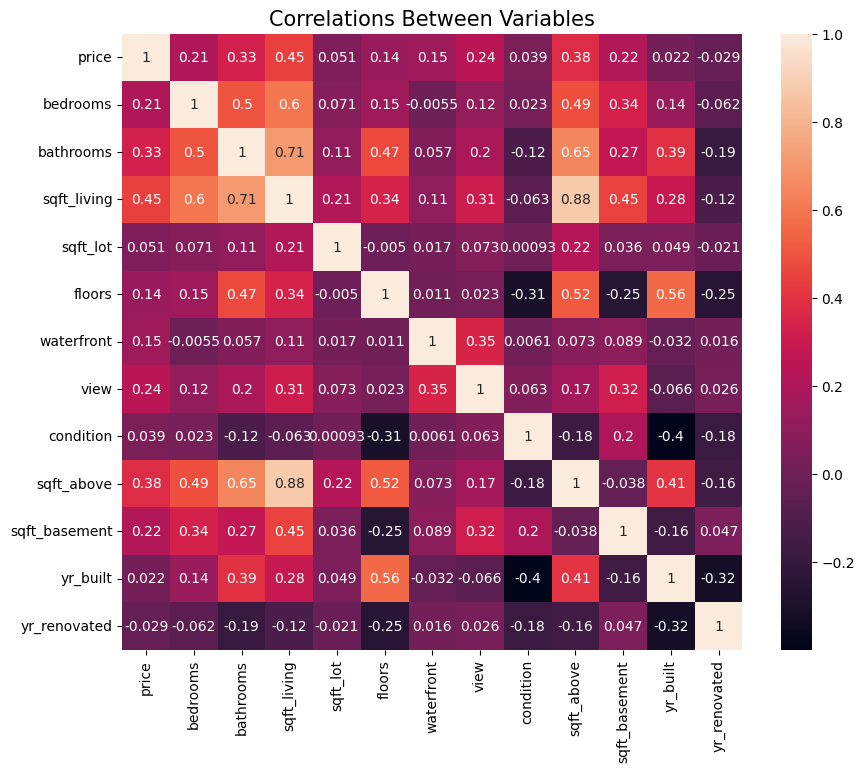

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlations Between Variables", size=15)
plt.yticks(rotation = 0)
plt.show()

# Data Visualisation

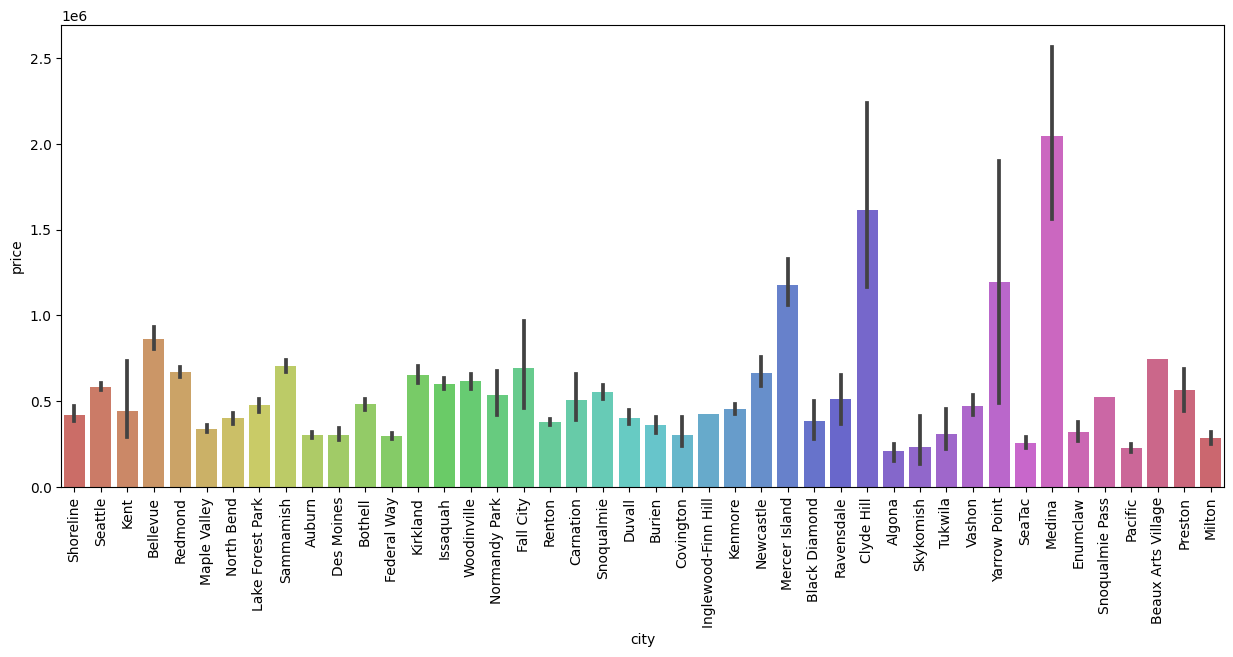

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['city'], y=df['price'], data=df.head(10), palette='hls')
plt.xticks(rotation=90)
plt.show()

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['city'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

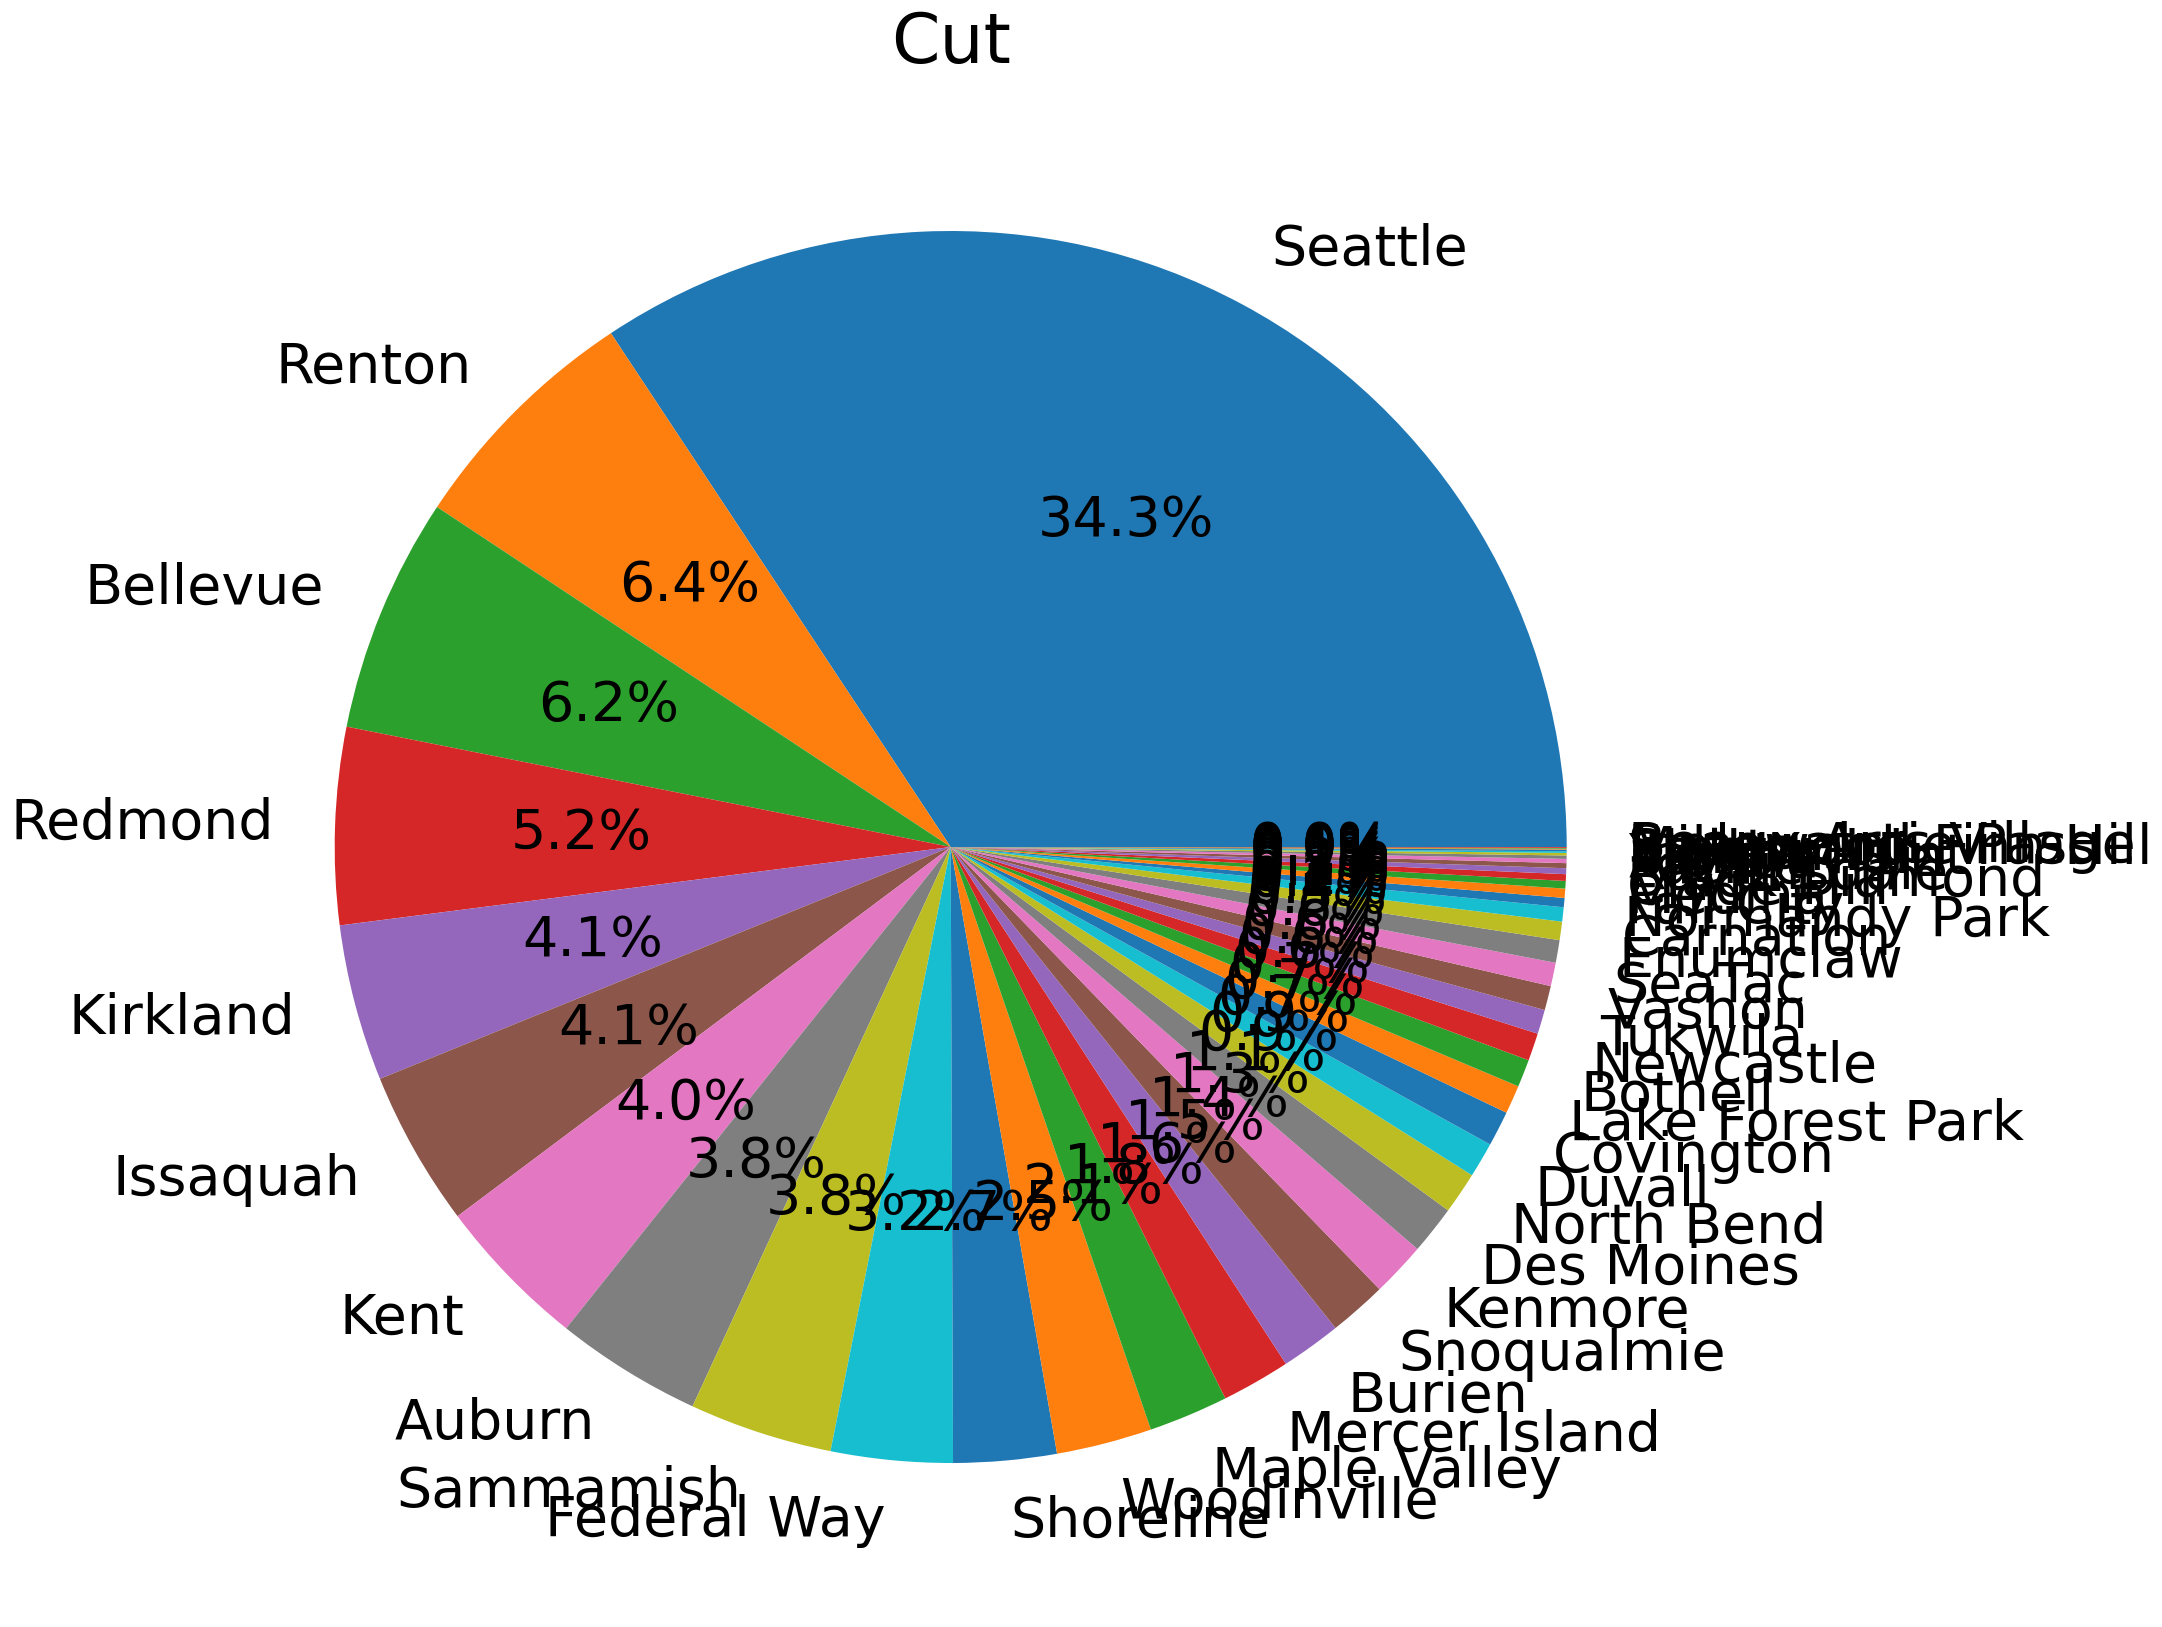

In [23]:
plt.figure(figsize=(30,20))
plt.pie(df["city"].value_counts(),labels=df["city"].value_counts().index,autopct="%0.1f%%", textprops={"fontsize":40})
plt.title('Cut',size=50)
plt.show()


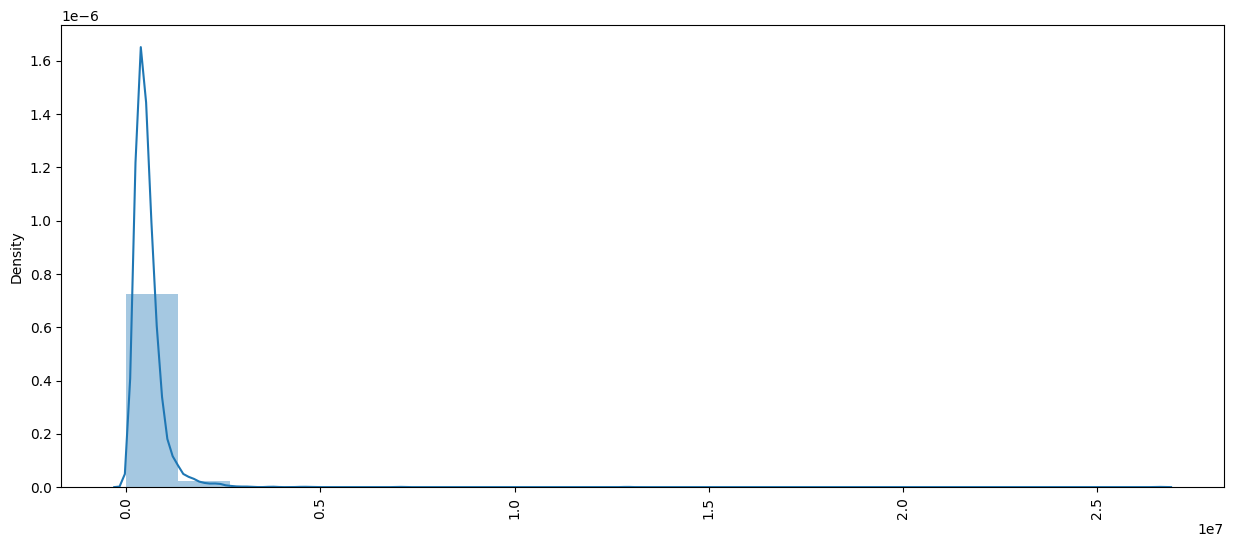

In [24]:
plt.figure(figsize=(15,6))
sns.distplot(x=df['price'],kde=True,bins=20)
plt.xticks(rotation=90)
plt.show()

In [25]:
numeric_df=df.select_dtypes(include=['float64','int64'])

In [26]:
numeric_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      313000.0         3          1         1340      7912       1   
1     2384000.0         5          2         3650      9050       2   
2      342000.0         3          2         1930     11947       1   
3      420000.0         3          2         2000      8030       1   
4      550000.0         4          2         1940     10500       1   
...         ...       ...        ...          ...       ...     ...   
4595   308166.0         3          1         1510      6360       1   
4596   534333.0         3          2         1460      7573       2   
4597   416904.0         3          2         3010      7014       2   
4598   203400.0         4          2         2090      6630       1   
4599   220600.0         3          2         1490      8102       2   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3        1340              0      1955   
1              0     4          5        3370            280      1921   
2              0     0          4        1930              0      1966   
3              0     0          4        1000           1000      1963   
4              0     0          4        1140            800      1976   
...          ...   ...        ...         ...            ...       ...   
4595           0     0          4        1510              0      1954   
4596           0     0          3        1460              0      1983   
4597           0     0          3        3010              0      2009   
4598           0     0          3        1070           1020      1974   
4599           0     0          4        1490              0      1990   

      yr_renovated  
0             2005  
1                0  
2                0  
3                0  
4             1992  
...            ...  
4595          1979  
4596          2009  
4597             0  
4598             0  
4599             0  

[4551 rows x 13 columns]

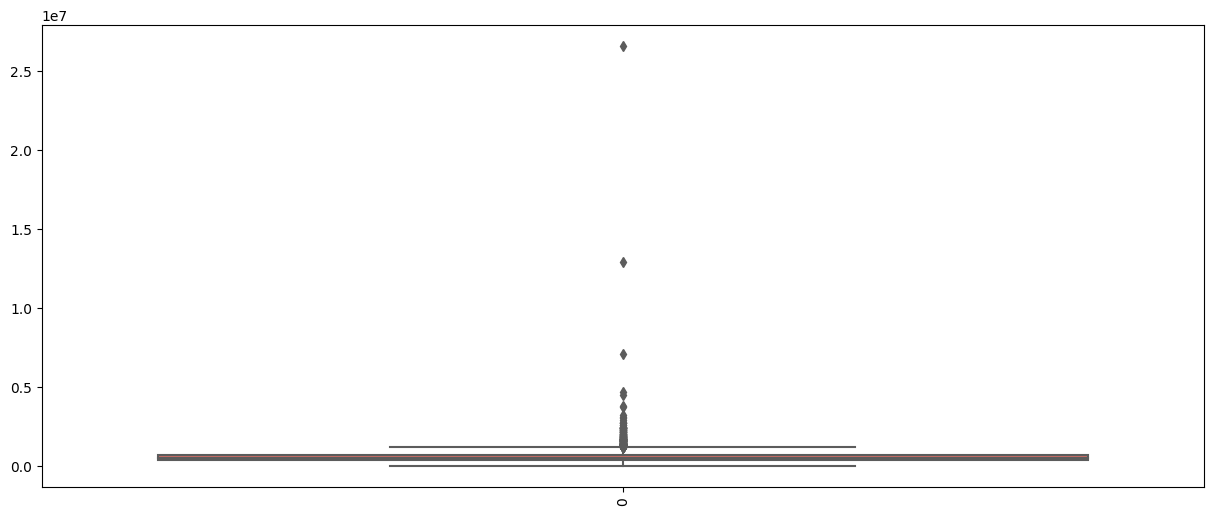

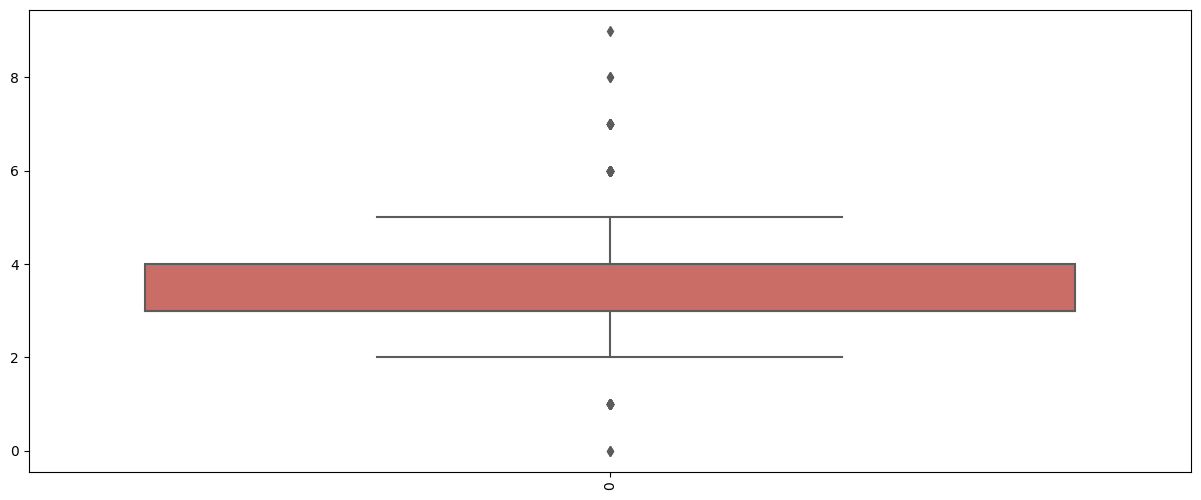

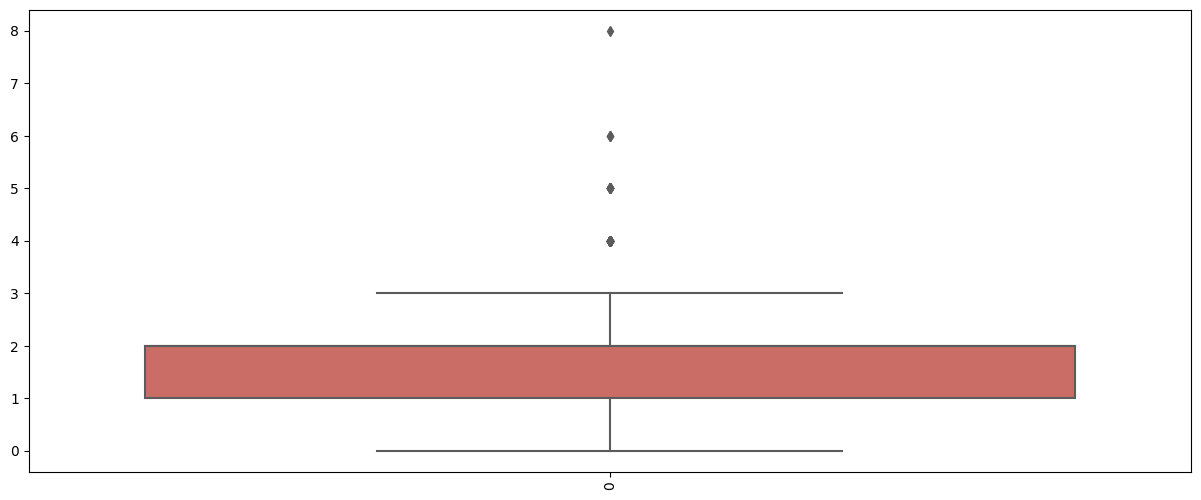

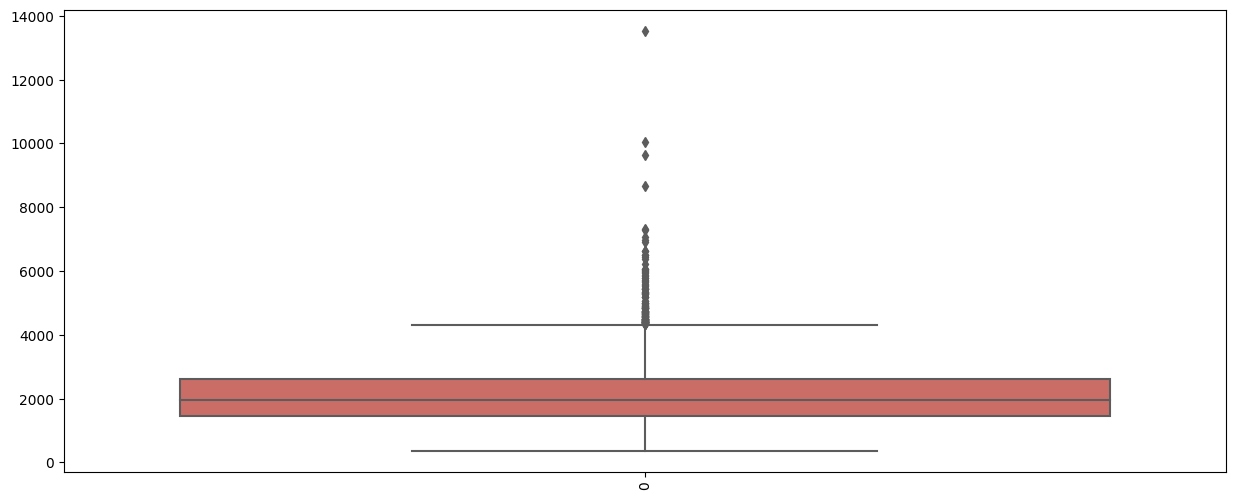

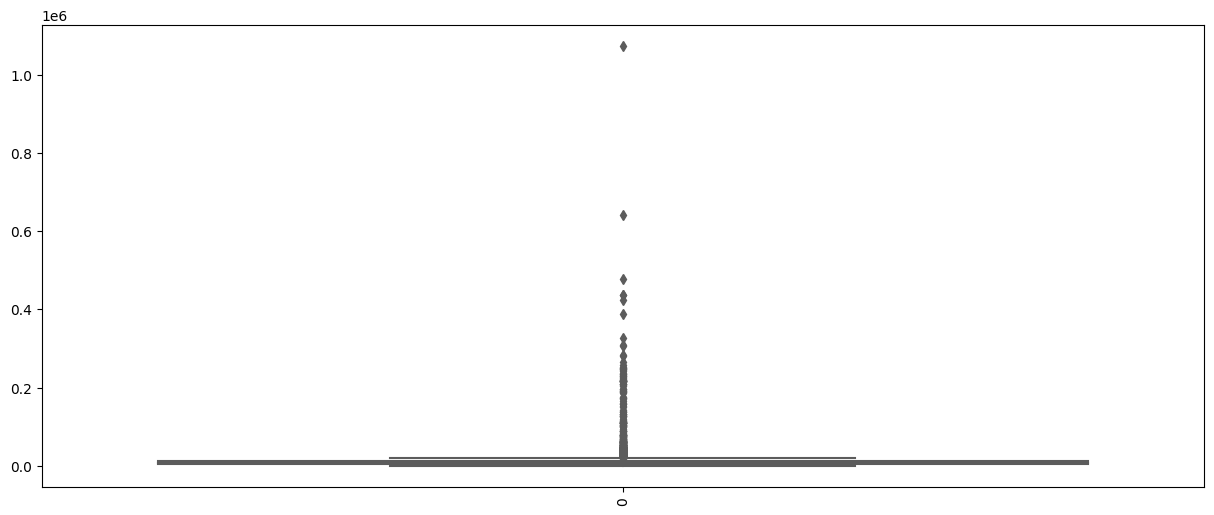

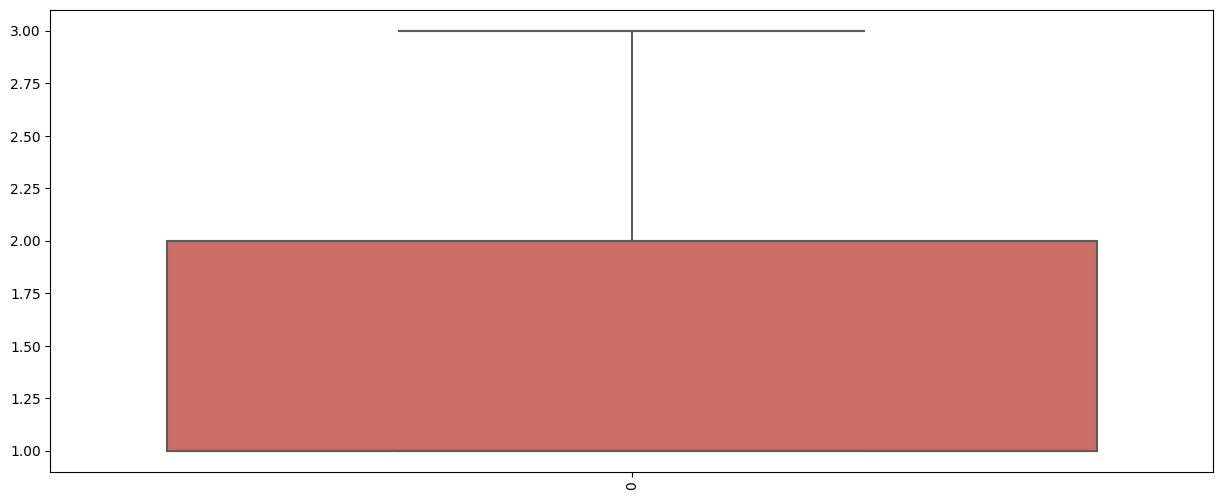

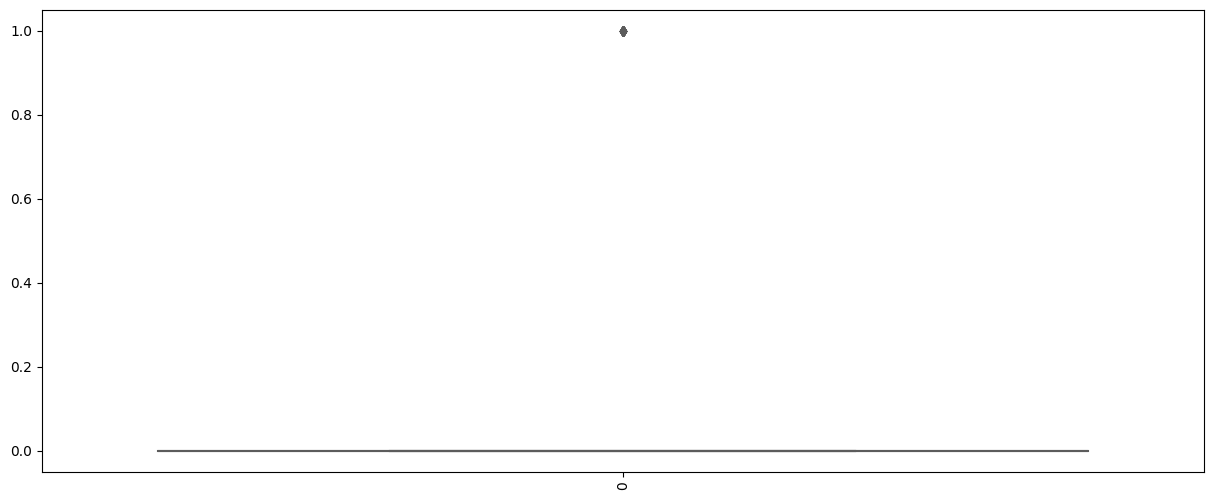

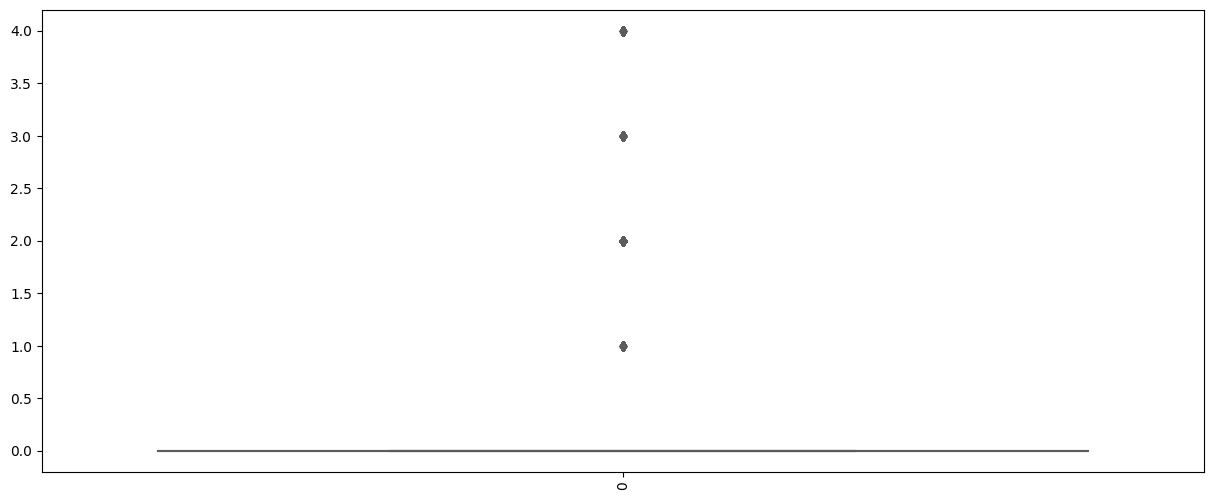

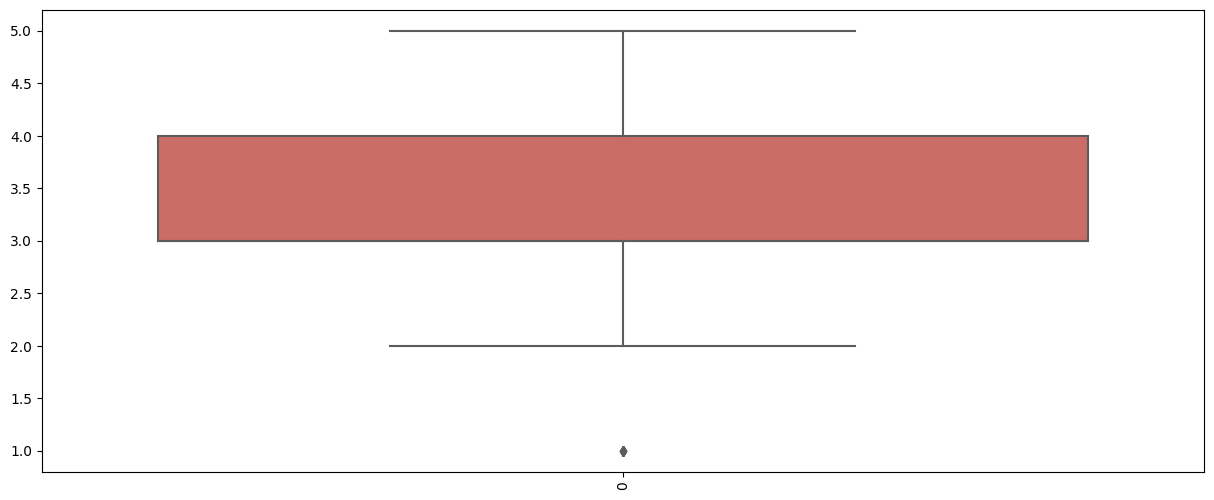

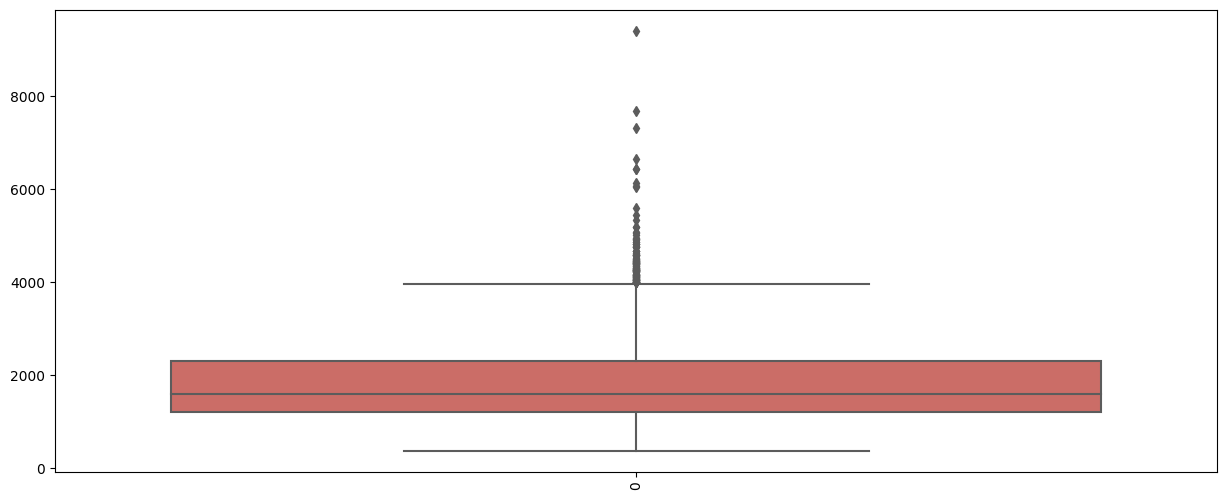

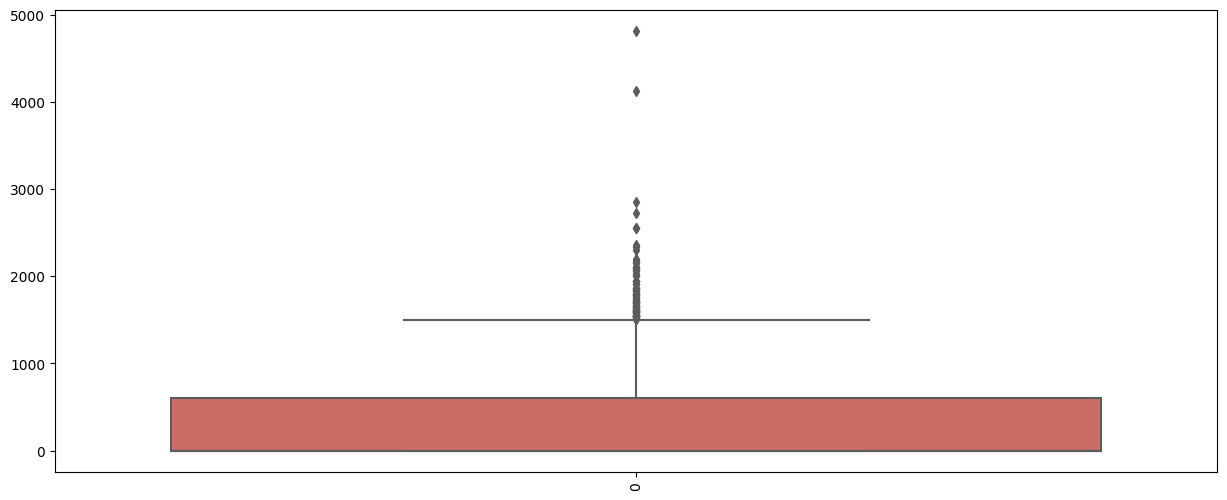

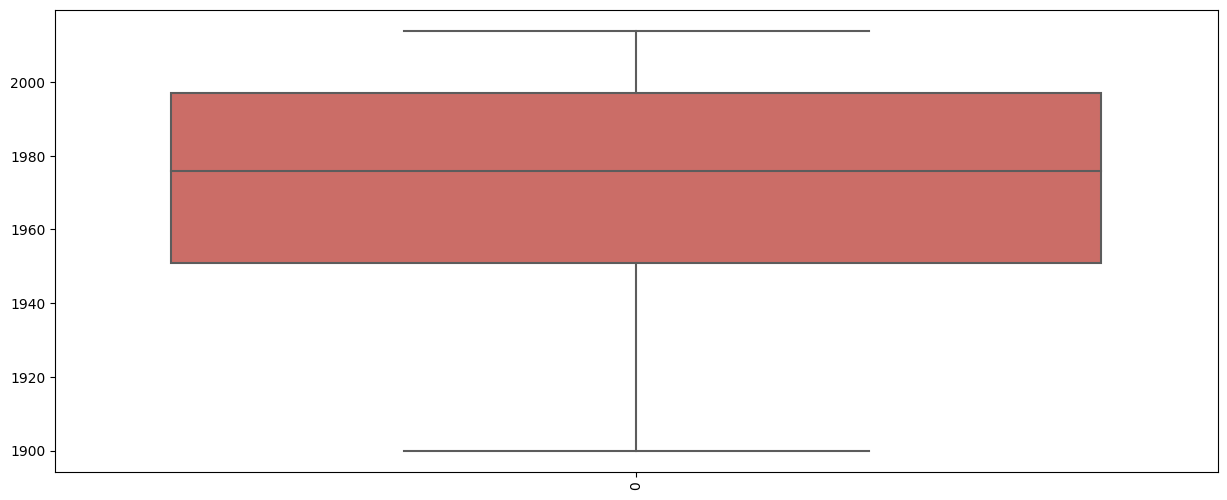

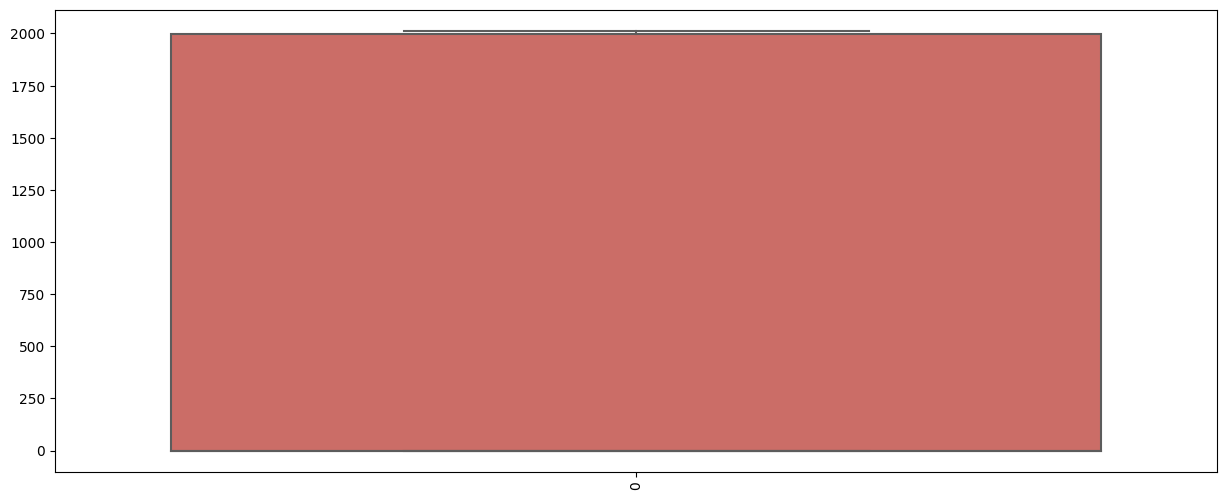

In [27]:
for i in numeric_df.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(numeric_df[i],palette= 'hls')
    plt.xticks(rotation=90)
    plt.show()

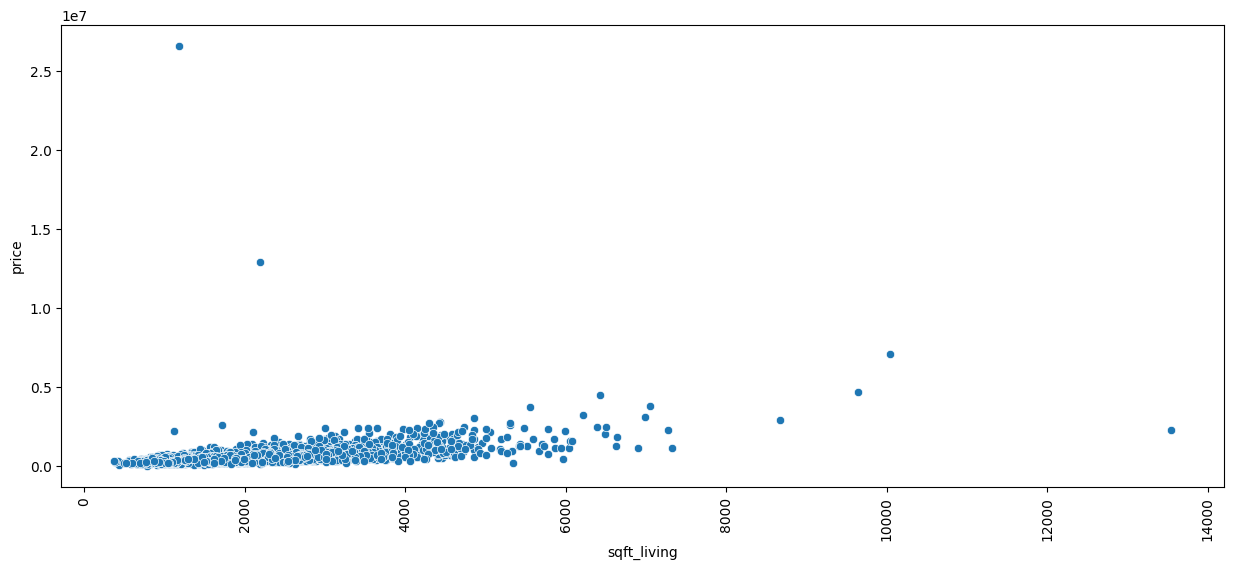

In [28]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['sqft_living'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

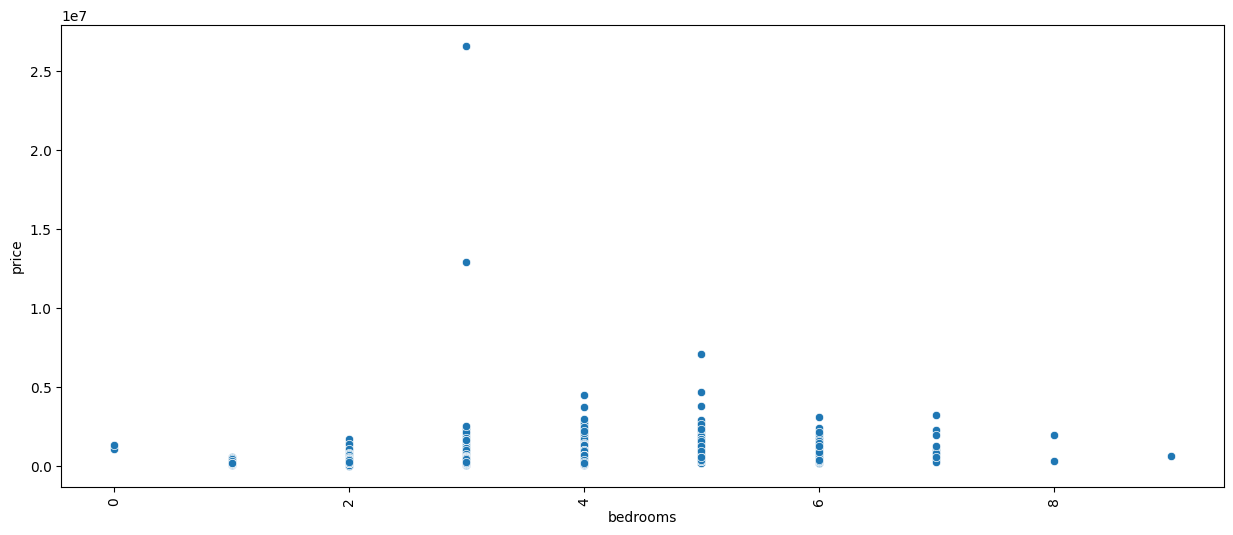

In [29]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['bedrooms'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

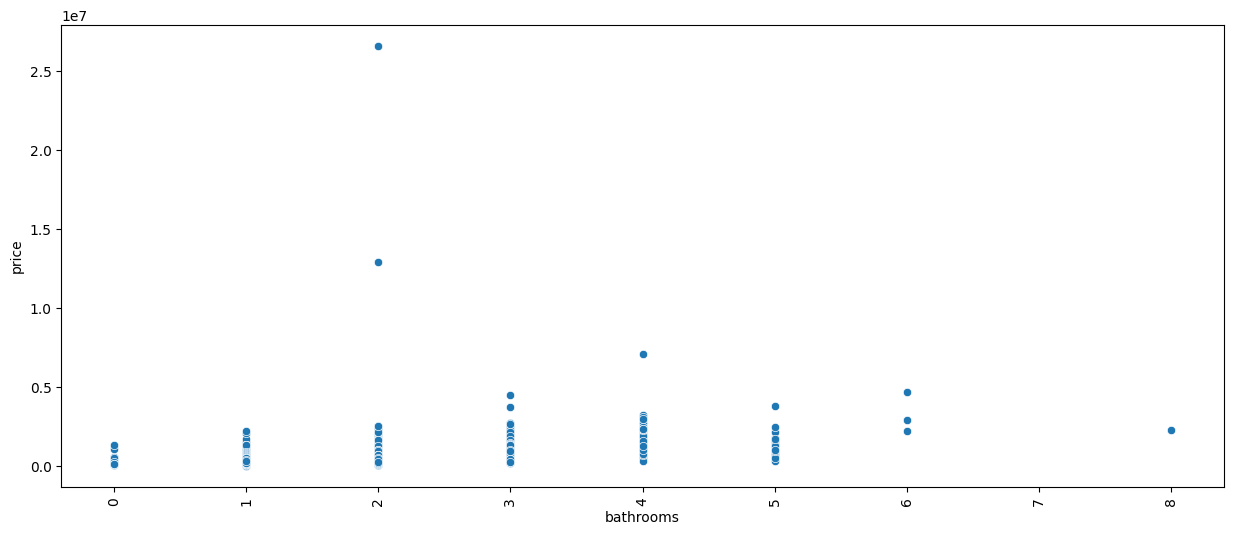

In [30]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['bathrooms'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

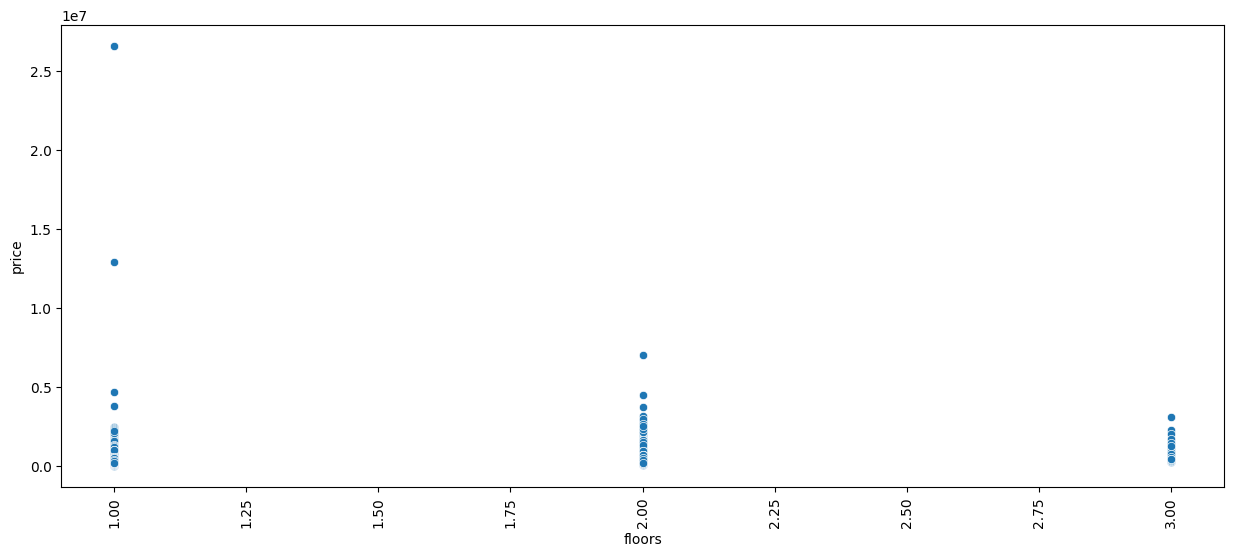

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['floors'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

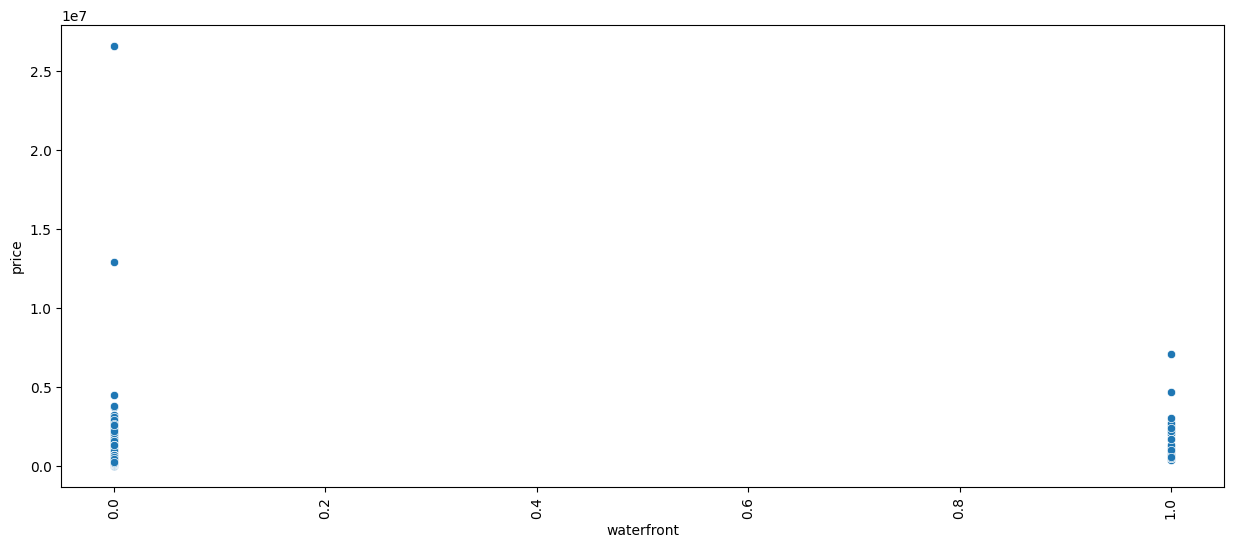

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['waterfront'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

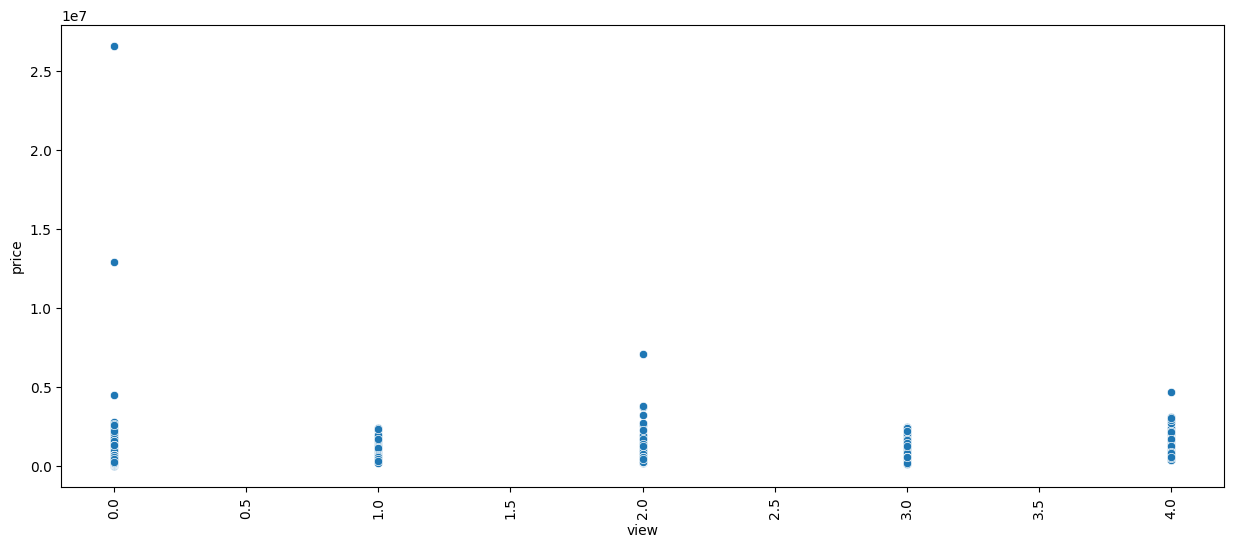

In [33]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['view'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

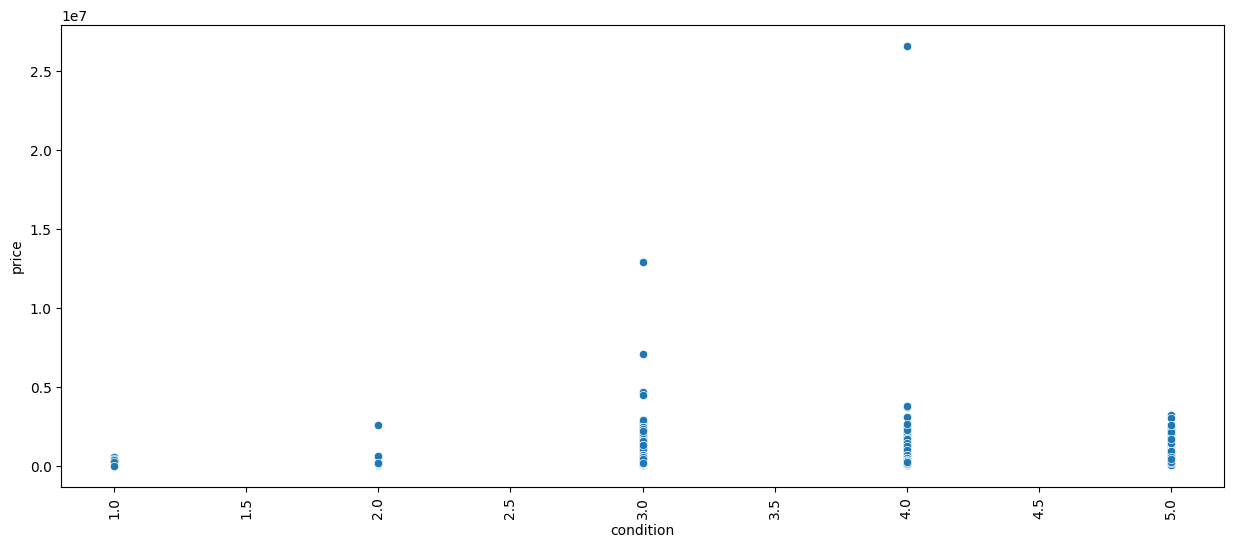

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['condition'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

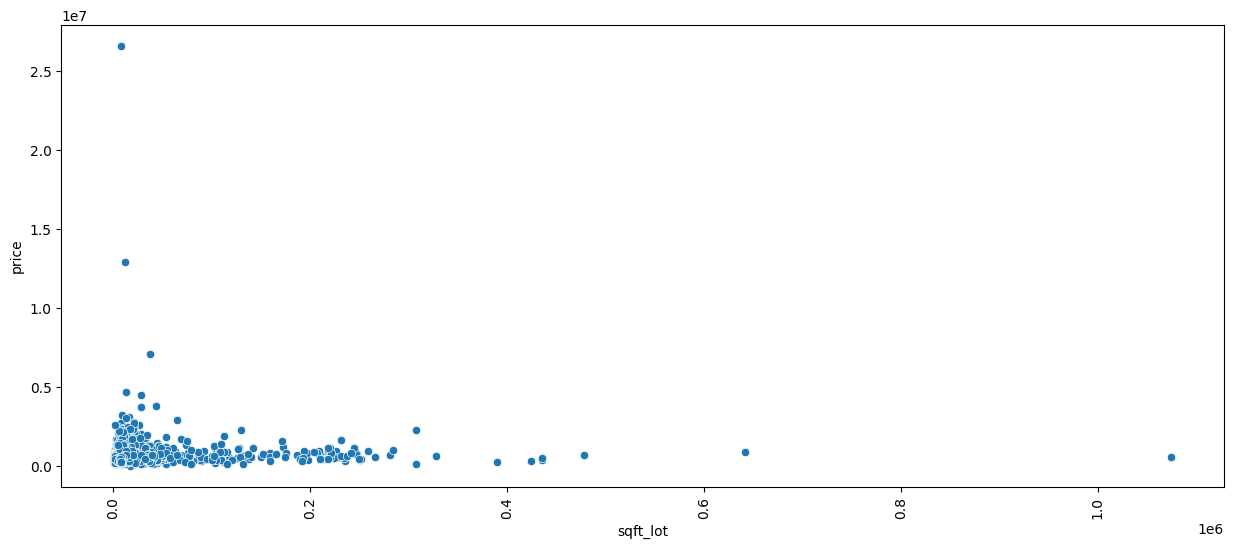

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['sqft_lot'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

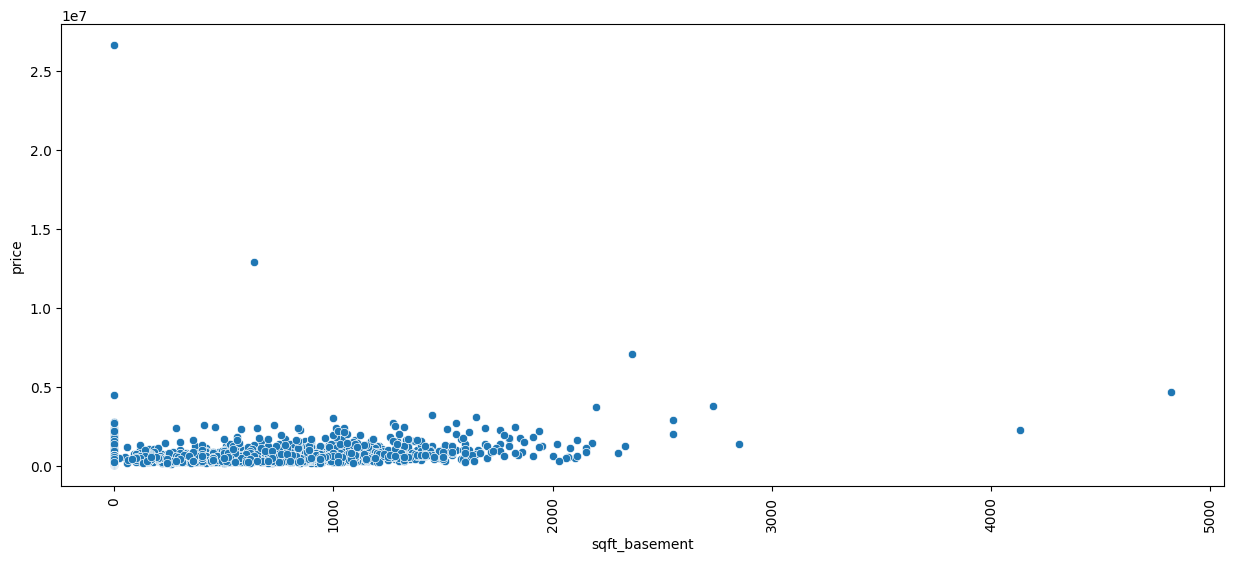

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['sqft_basement'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

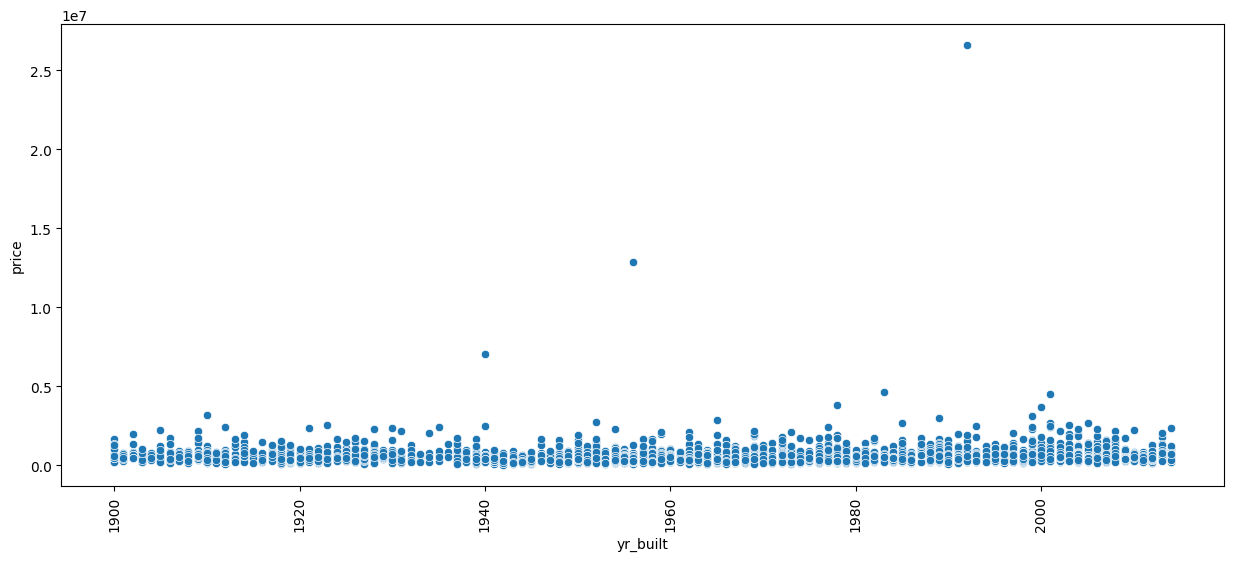

In [37]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['yr_built'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

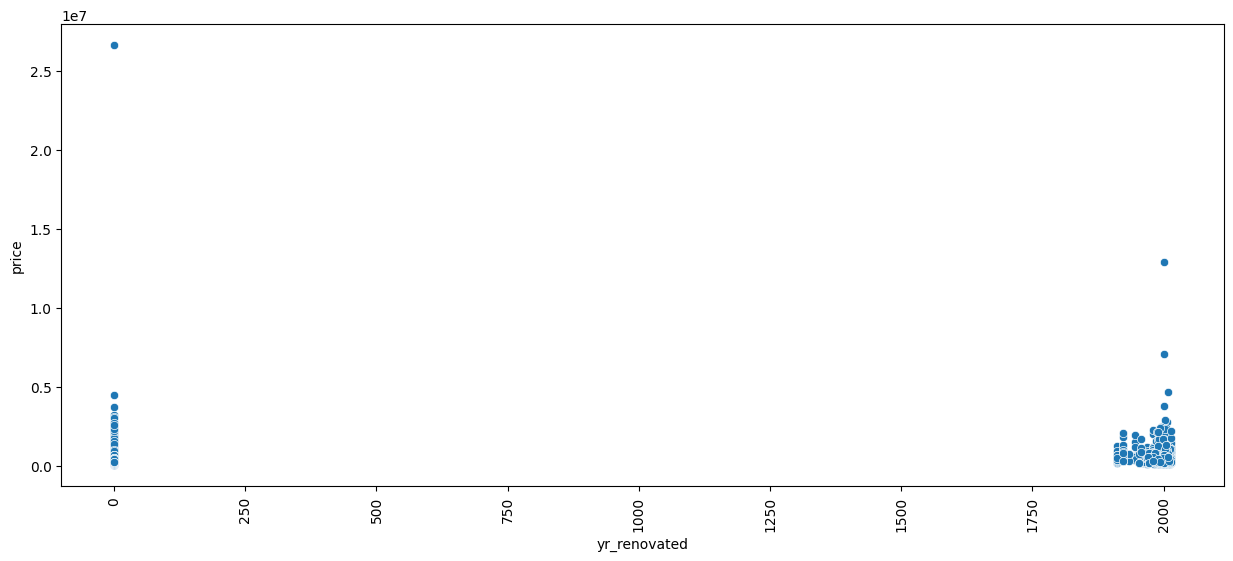

In [38]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['yr_renovated'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

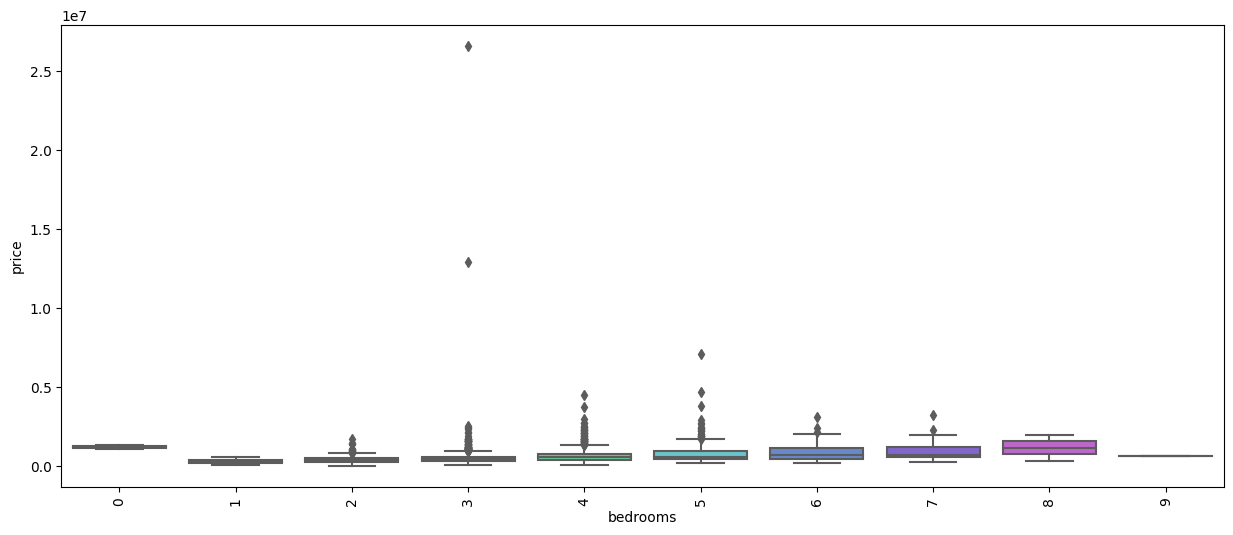

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['bedrooms'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

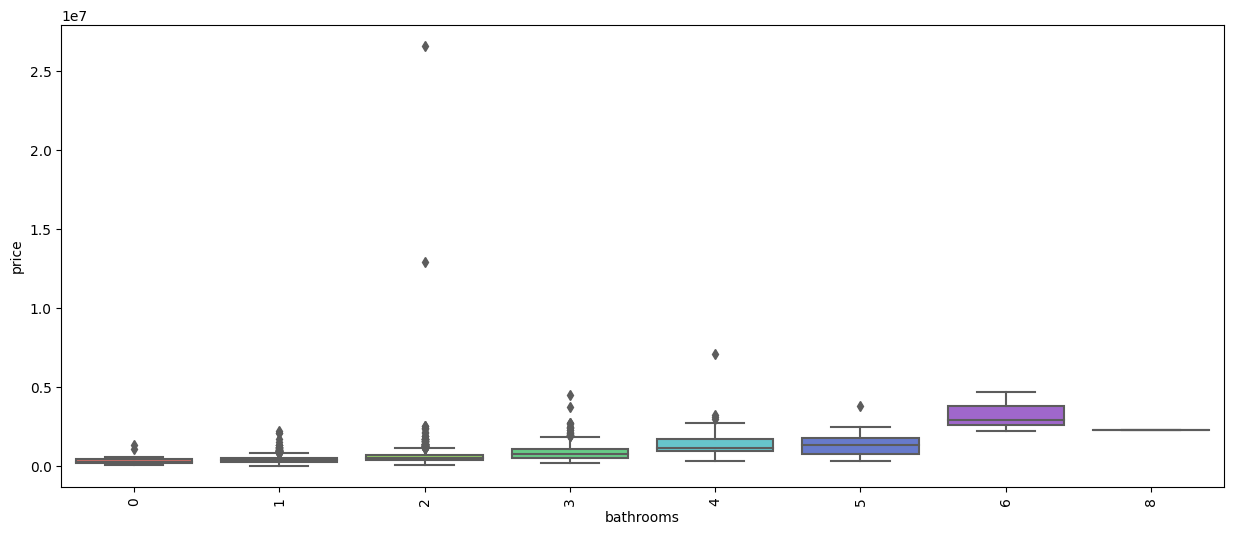

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['bathrooms'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

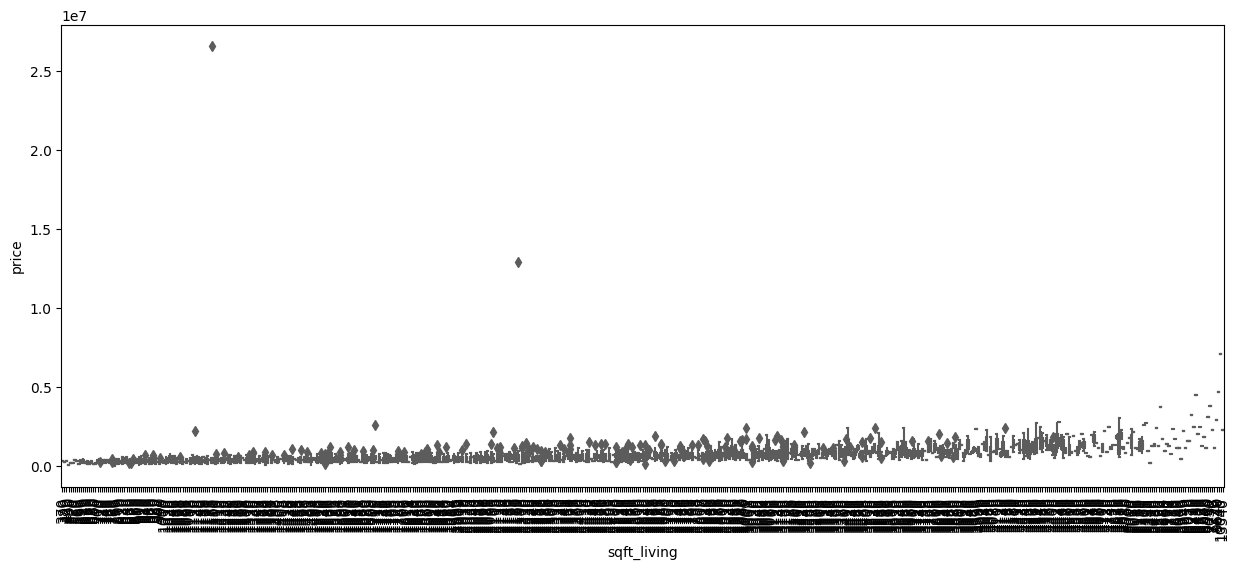

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['sqft_living'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

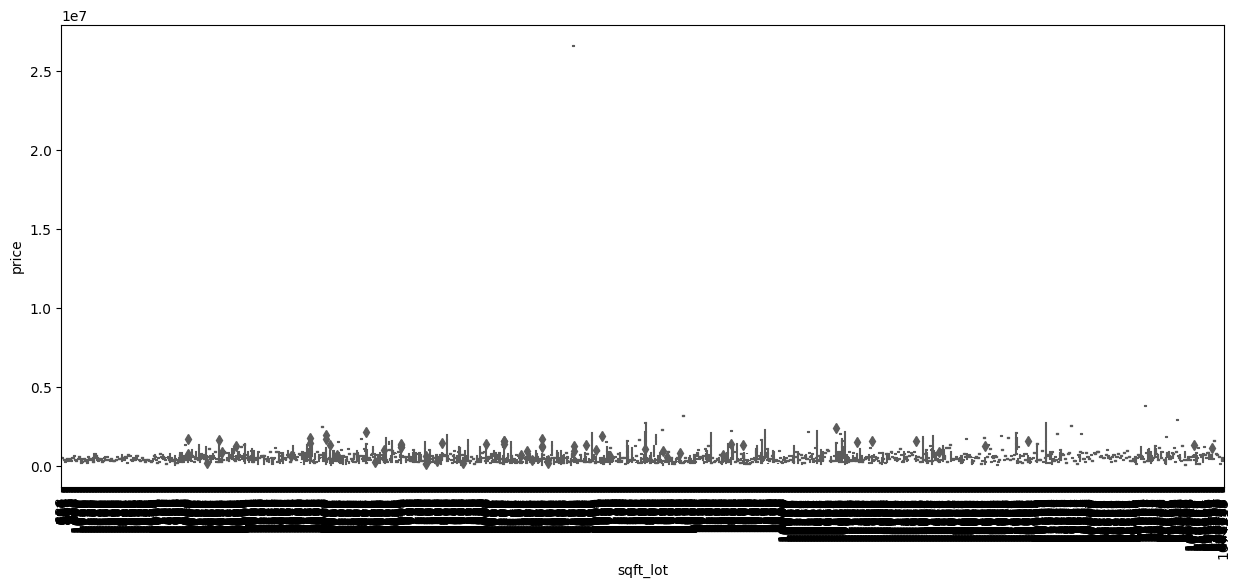

In [42]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['sqft_lot'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

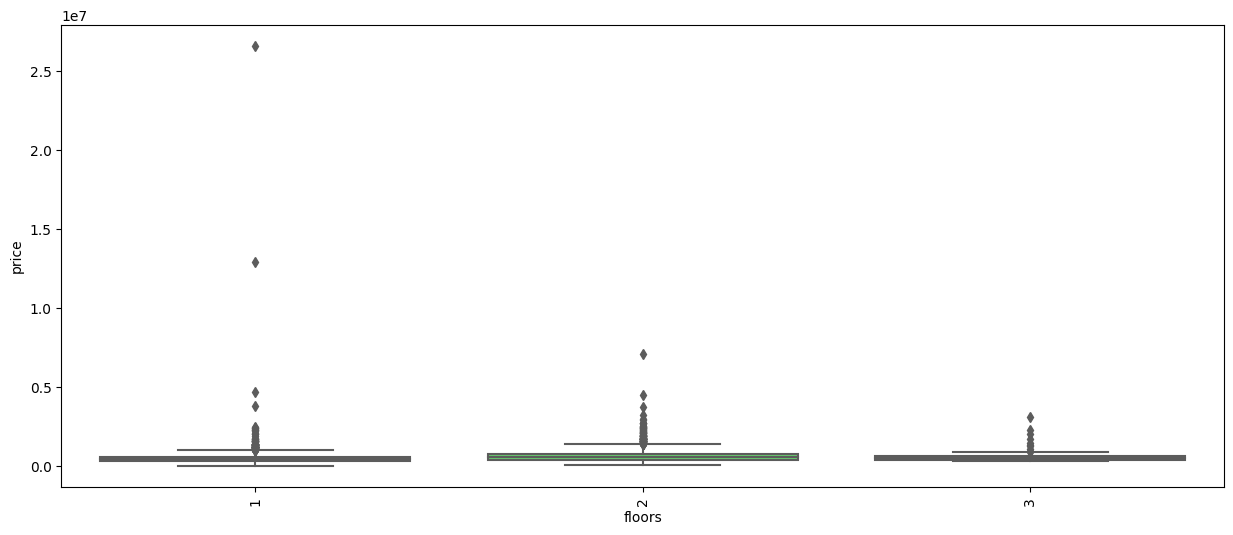

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['floors'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

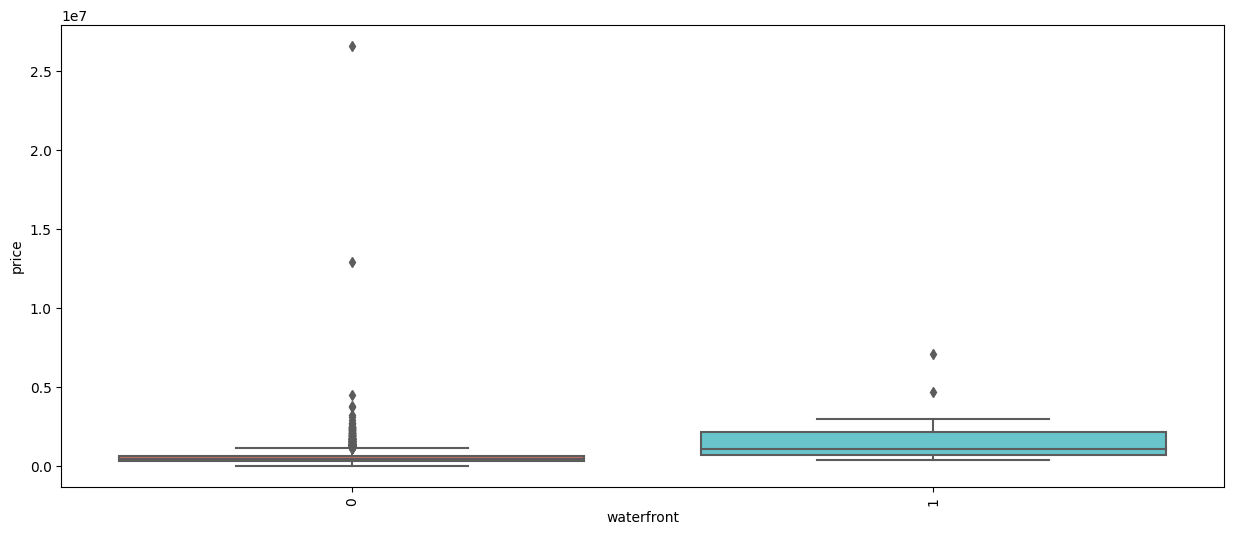

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['waterfront'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

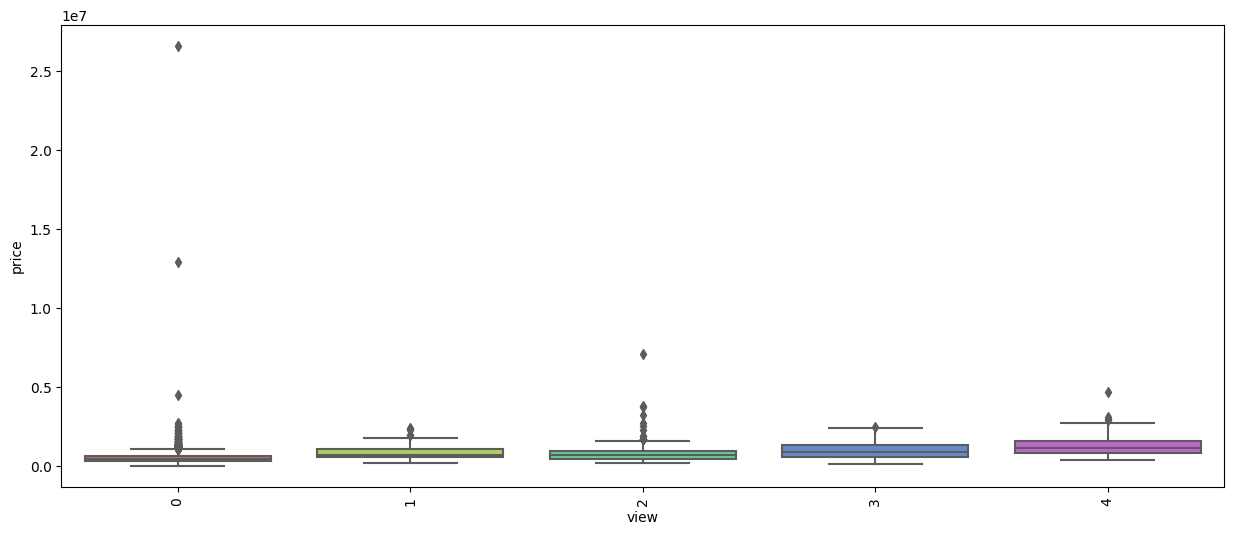

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['view'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

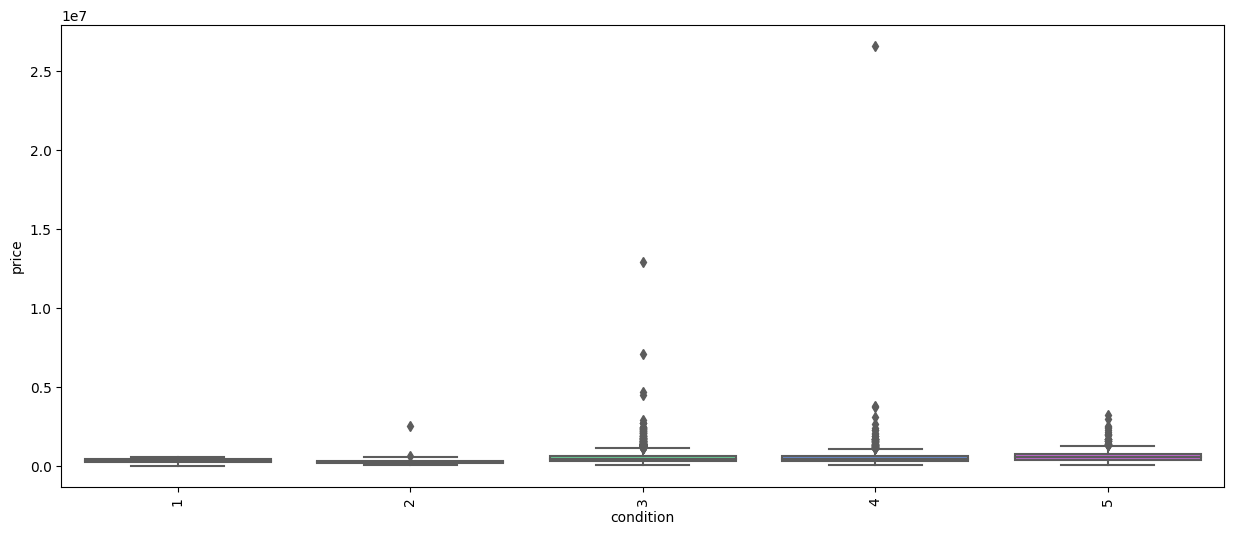

In [46]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['condition'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

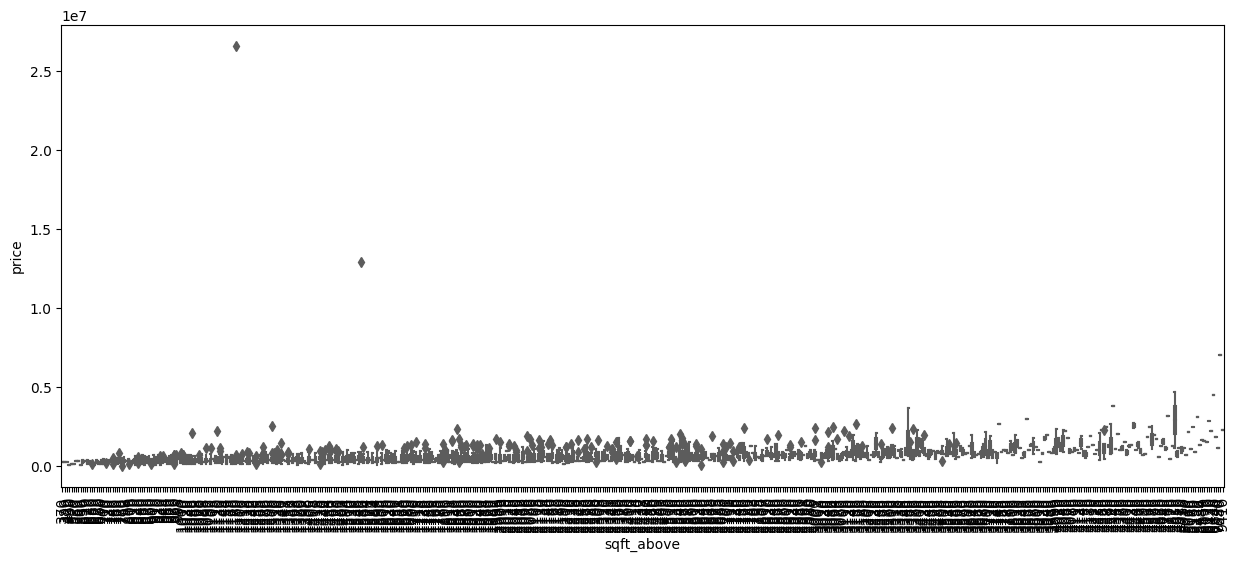

In [47]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['sqft_above'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

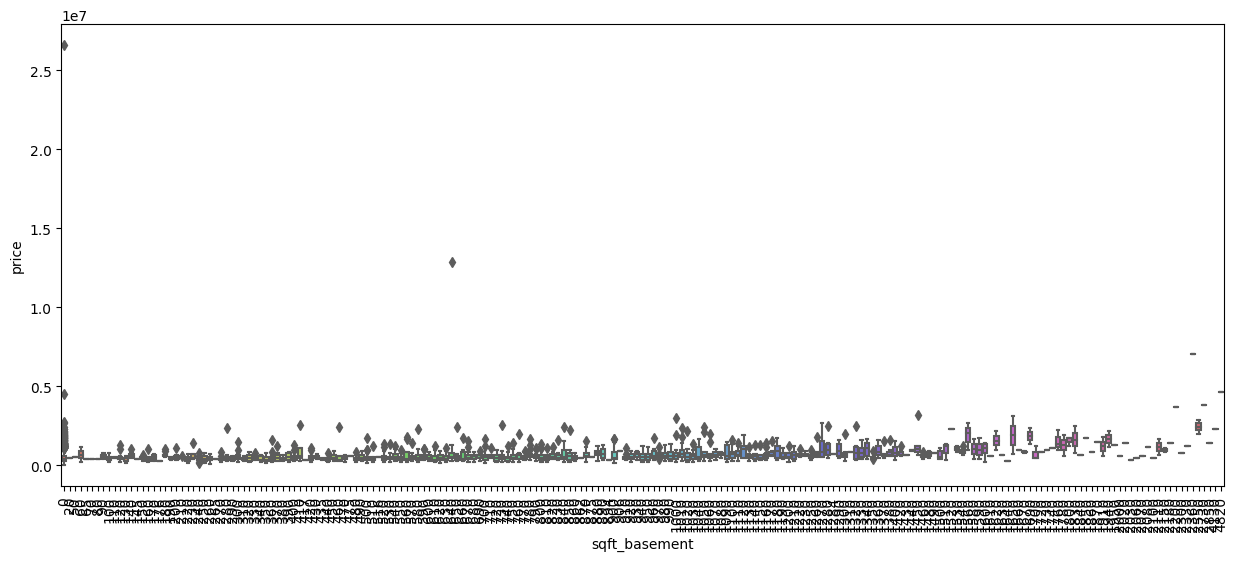

In [48]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['sqft_basement'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

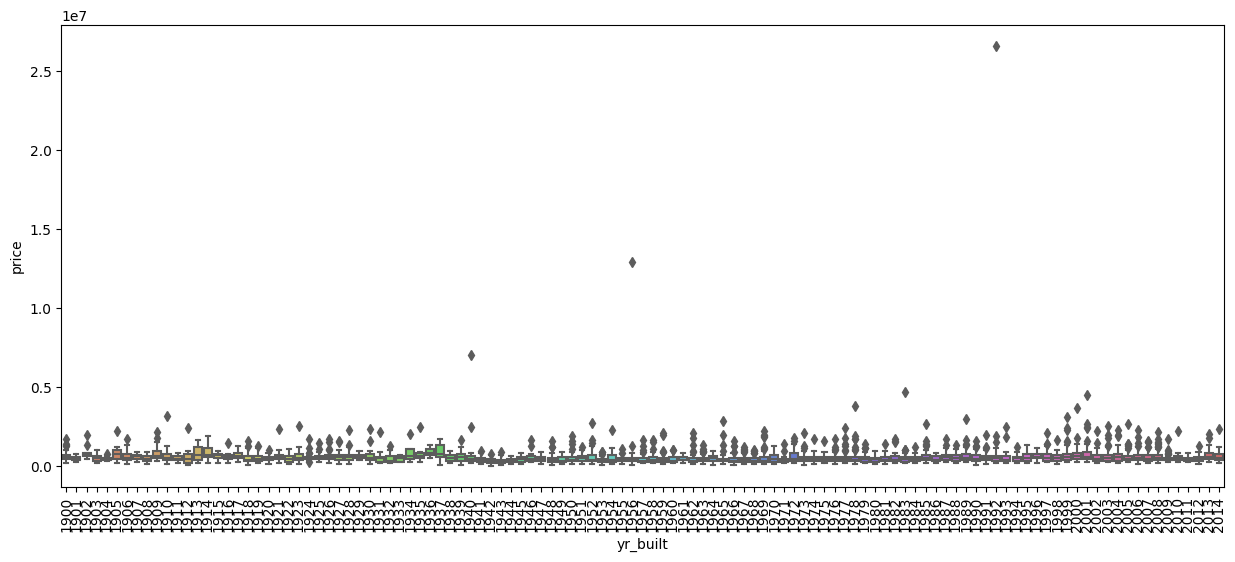

In [49]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['yr_built'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

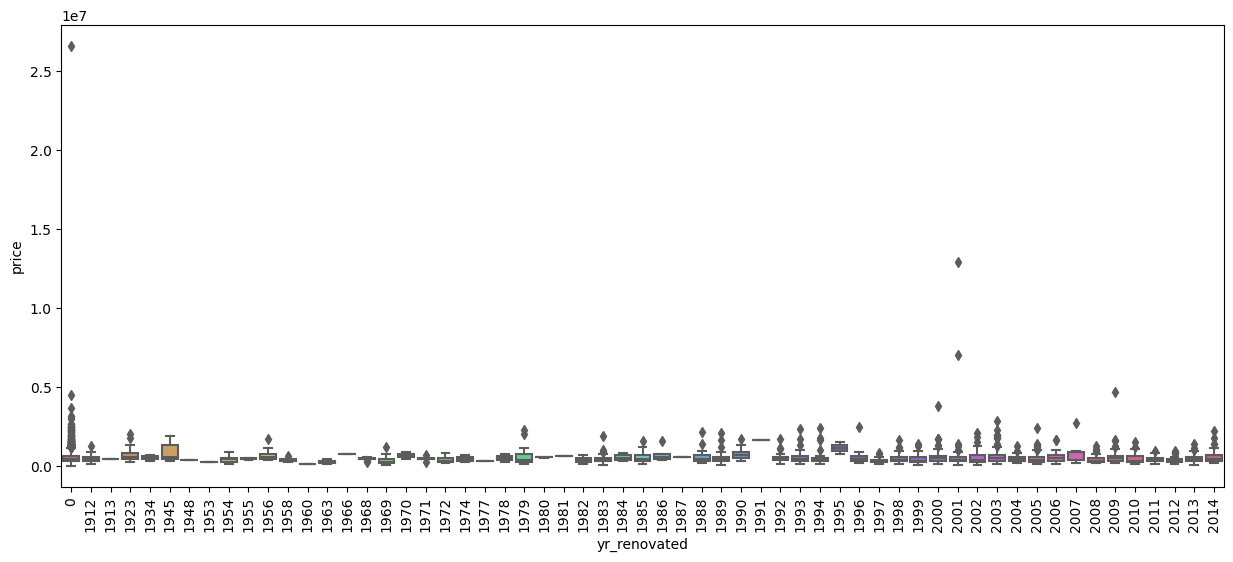

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['yr_renovated'],y=df['price'], palette='hls')
plt.xticks(rotation=90)
plt.show()

In [51]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.210228   0.331917     0.445494  0.051347  0.138342   
bedrooms       0.210228  1.000000   0.499640     0.596053  0.071138  0.154922   
bathrooms      0.331917  0.499640   1.000000     0.706352  0.111565  0.466471   
sqft_living    0.445494  0.596053   0.706352     1.000000  0.213268  0.339348   
sqft_lot       0.051347  0.071138   0.111565     0.213268  1.000000 -0.005019   
floors         0.138342  0.154922   0.466471     0.339348 -0.005019  1.000000   
waterfront     0.150083 -0.005521   0.056590     0.107758  0.017408  0.010928   
view           0.242587  0.115080   0.196671     0.309343  0.072527  0.022631   
condition      0.038892  0.023018  -0.118957    -0.062529  0.000929 -0.305362   
sqft_above     0.380661  0.485672   0.645209     0.875657  0.219193  0.516264   
sqft_basement  0.217782  0.335103   0.268266     0.449671  0.035894 -0.252654   
yr_built       0.021757  0.141498   0.394298     0.284733  0.049163  0.561159   
yr_renovated  -0.029034 -0.062219  -0.188182    -0.121589 -0.021068 -0.248916   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.150083  0.242587   0.038892    0.380661       0.217782   
bedrooms        -0.005521  0.115080   0.023018    0.485672       0.335103   
bathrooms        0.056590  0.196671  -0.118957    0.645209       0.268266   
sqft_living      0.107758  0.309343  -0.062529    0.875657       0.449671   
sqft_lot         0.017408  0.072527   0.000929    0.219193       0.035894   
floors           0.010928  0.022631  -0.305362    0.516264      -0.252654   
waterfront       1.000000  0.347572   0.006112    0.072502       0.088880   
view             0.347572  1.000000   0.062560    0.174629       0.317117   
condition        0.006112  0.062560   1.000000   -0.176549       0.197144   
sqft_above       0.072502  0.174629  -0.176549    1.000000      -0.037597   
sqft_basement    0.088880  0.317117   0.197144   -0.037597       1.000000   
yr_built        -0.032017 -0.066344  -0.398886    0.406436      -0.162538   
yr_renovated     0.015821  0.025846  -0.184483   -0.161281       0.046698   

               yr_built  yr_renovated  
price          0.021757     -0.029034  
bedrooms       0.141498     -0.062219  
bathrooms      0.394298     -0.188182  
sqft_living    0.284733     -0.121589  
sqft_lot       0.049163     -0.021068  
floors         0.561159     -0.248916  
waterfront    -0.032017      0.015821  
view          -0.066344      0.025846  
condition     -0.398886     -0.184483  
sqft_above     0.406436     -0.161281  
sqft_basement -0.162538      0.046698  
yr_built       1.000000     -0.322938  
yr_renovated  -0.322938      1.000000

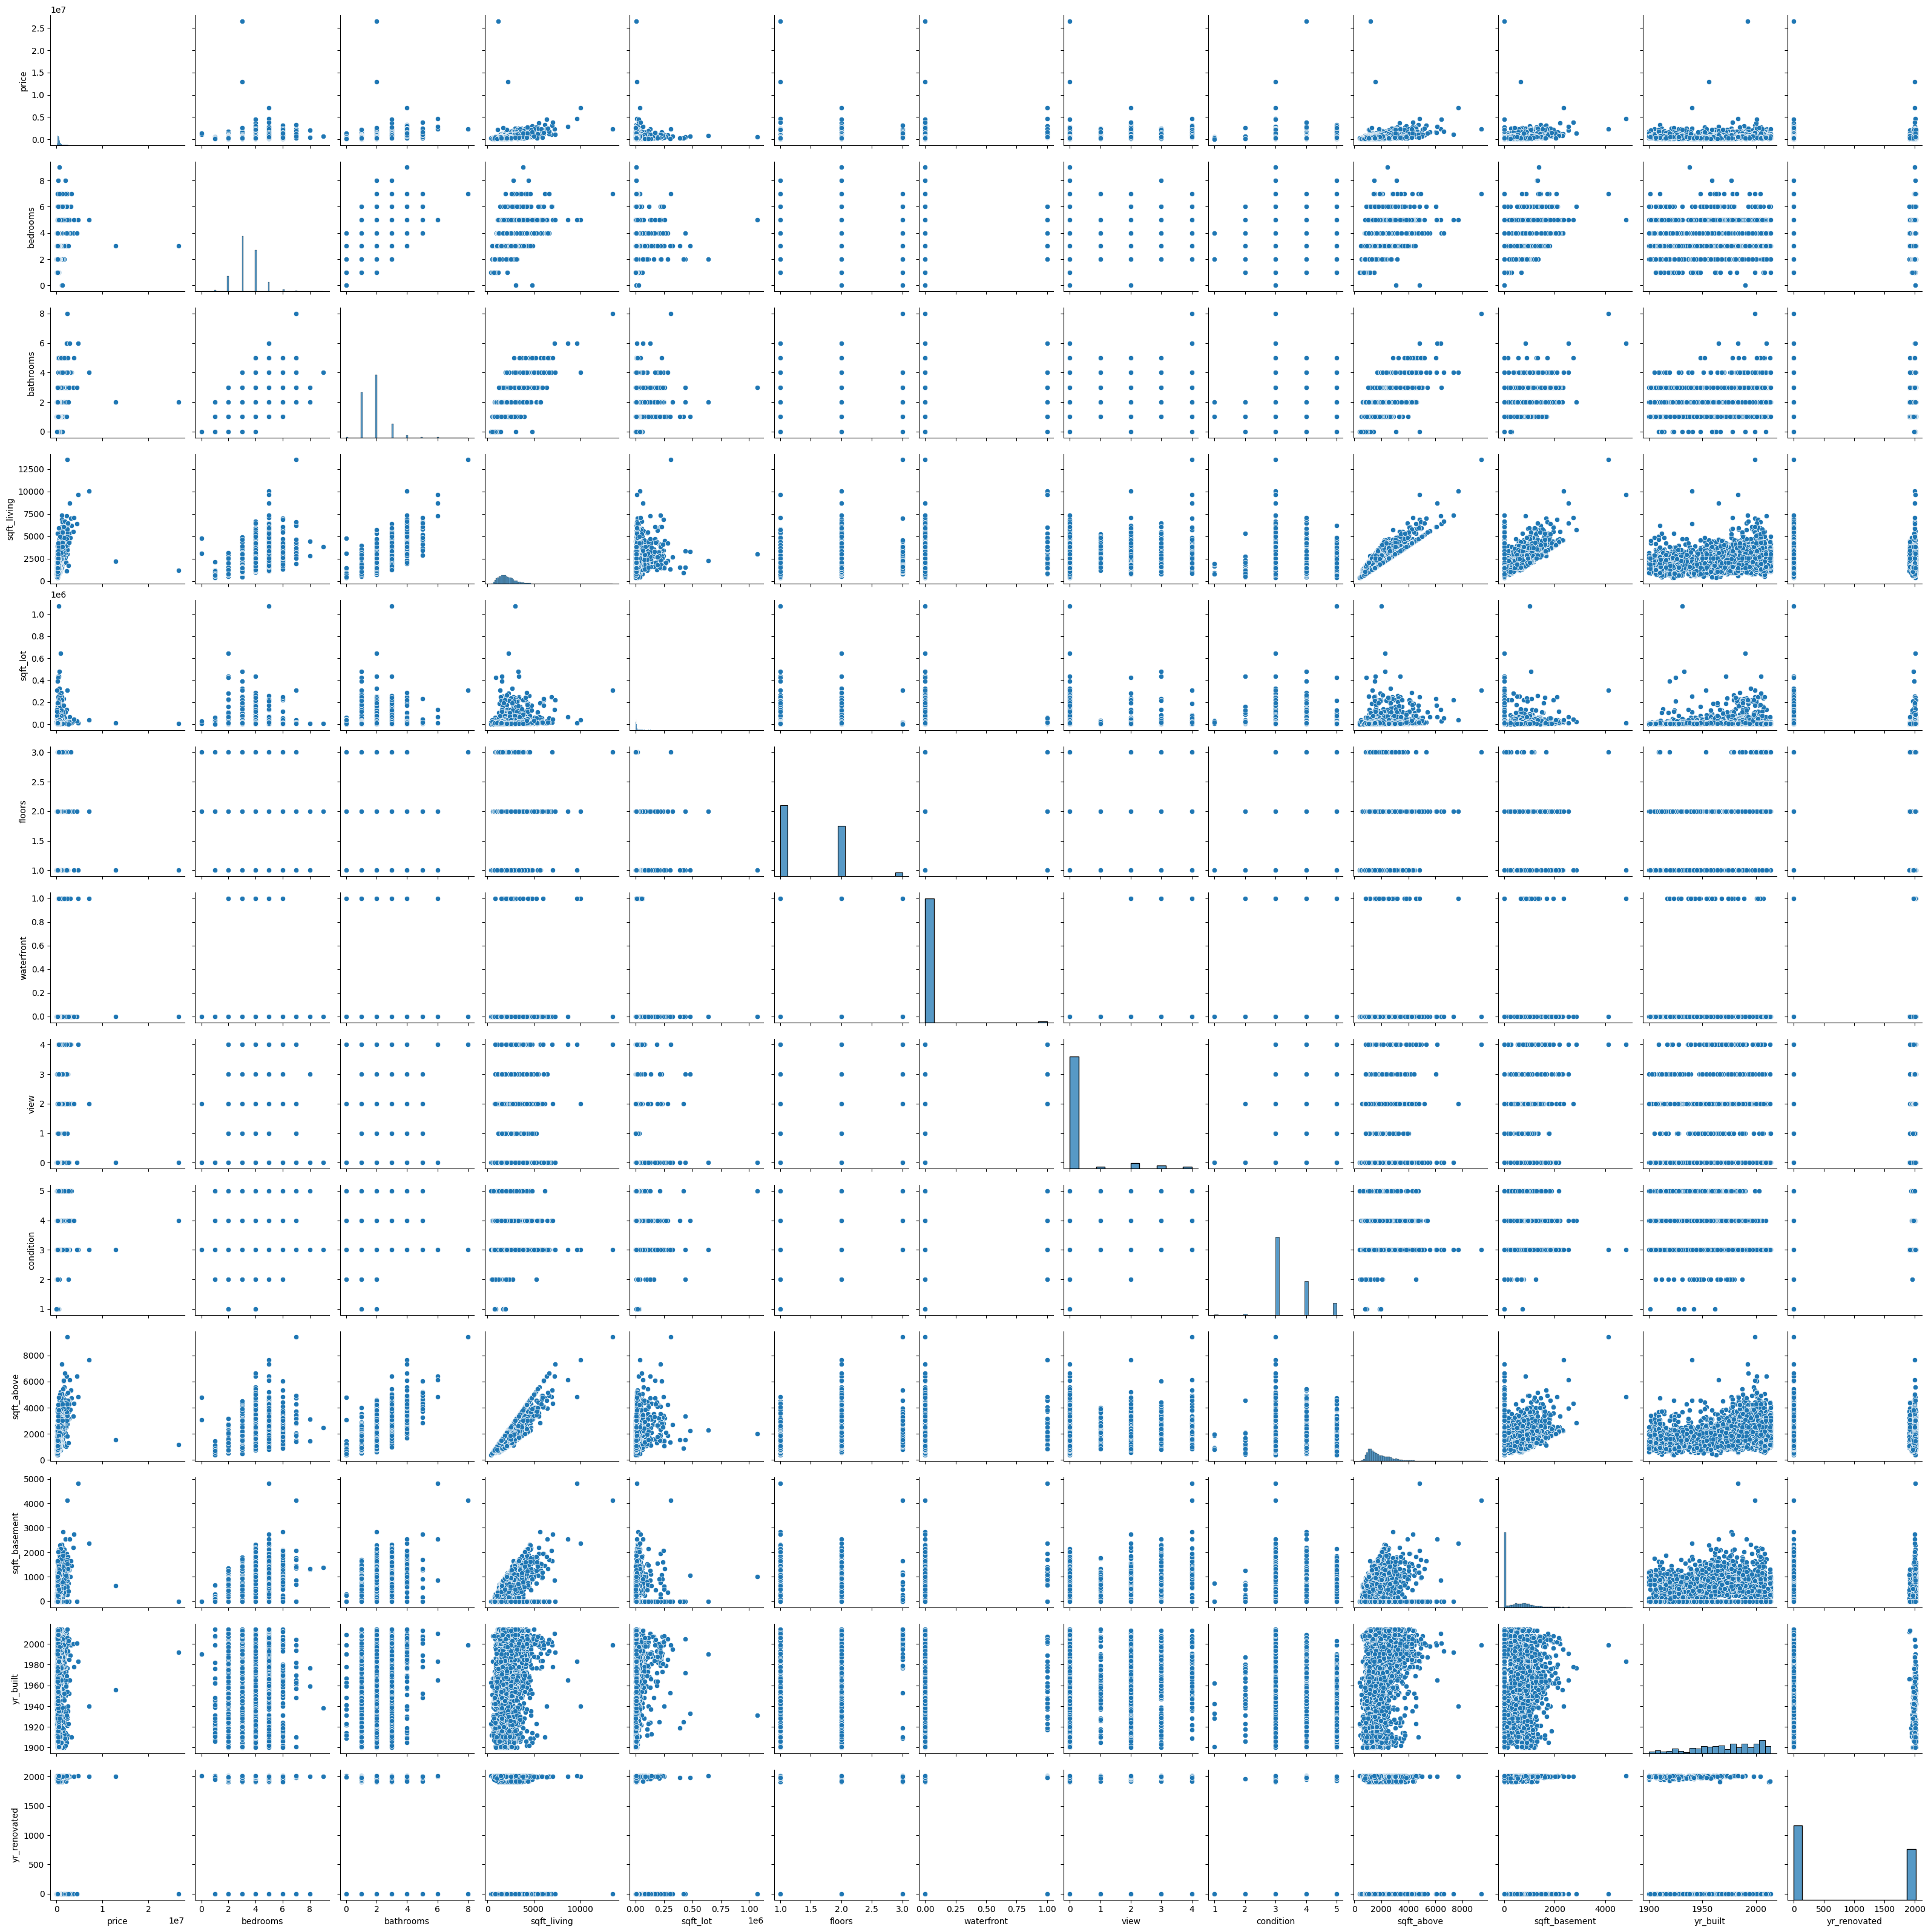

In [52]:
sns.pairplot(df)

## Applying One-Hot encoding on City and then reducing Dimension using PCA


In [106]:
from sklearn.decomposition import PCA
X = pd.get_dummies(df.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['city_pca1'] = X_pca[:, 0]
df['city_pca2'] = X_pca[:, 1]

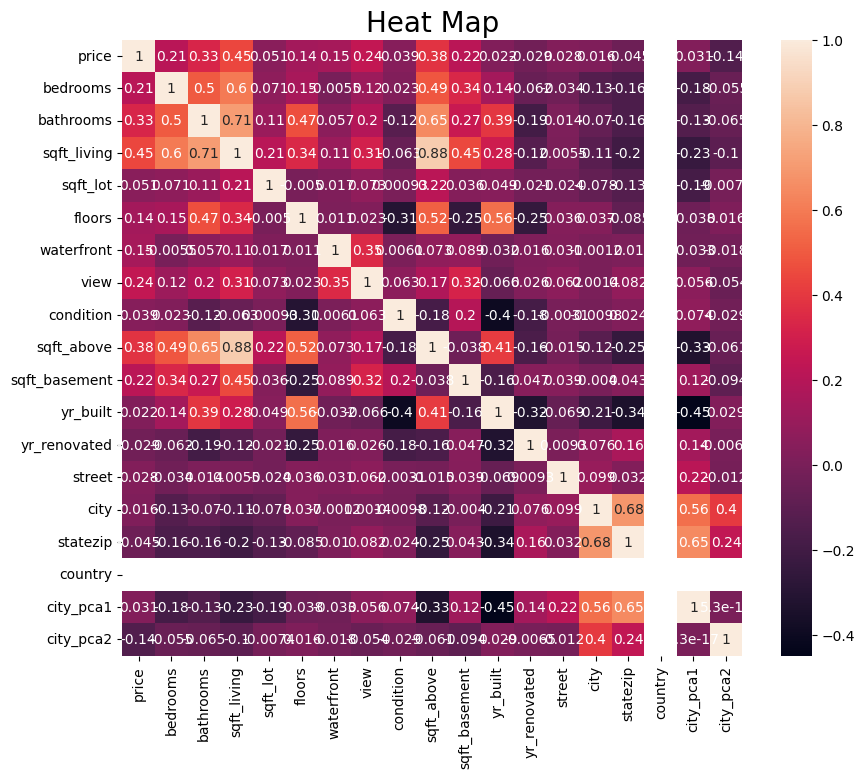

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [109]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'city_pca1', 'city_pca2'],
      dtype='object')

## Dropping unnecessary Variables¶


In [112]:
df = df.drop(['street', 'statezip', 'country','city'], axis = 1)

In [113]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3          1         1340      7912       1           0   
1  2384000.0         5          2         3650      9050       2           0   
2   342000.0         3          2         1930     11947       1           0   
3   420000.0         3          2         2000      8030       1           0   
4   550000.0         4          2         1940     10500       1           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

   city_pca1  city_pca2  
0  -0.335436  -0.020313  
1   0.674189   0.002673  
2  -0.358190  -0.033780  
3  -0.401499  -0.600286  
4  -0.379726  -0.066183

In [114]:
df.shape

(4551, 15)

In [116]:
df.describe().T

count          mean            std          min  \
price          4551.0  5.579059e+05  563929.874935  7800.000000   
bedrooms       4551.0  3.394639e+00       0.904595     0.000000   
bathrooms      4551.0  1.782905e+00       0.744431     0.000000   
sqft_living    4551.0  2.132372e+03     955.949708   370.000000   
sqft_lot       4551.0  1.483528e+04   35964.077825   638.000000   
floors         4551.0  1.459240e+00       0.552355     1.000000   
waterfront     4551.0  6.591958e-03       0.080932     0.000000   
view           4551.0  2.346737e-01       0.765373     0.000000   
condition      4551.0  3.449352e+00       0.675160     1.000000   
sqft_above     4551.0  1.822222e+03     854.452888   370.000000   
sqft_basement  4551.0  3.101505e+02     461.987629     0.000000   
yr_built       4551.0  1.970796e+03      29.760073  1900.000000   
yr_renovated   4551.0  8.085641e+02     979.421487     0.000000   
city_pca1      4551.0  6.713544e-17       0.487929    -0.406567   
city_pca2      4551.0  3.737336e-17       0.251016    -0.600286   

                         25%            50%            75%           max  
price          326264.000000  465000.000000  657500.000000  2.659000e+07  
bedrooms            3.000000       3.000000       4.000000  9.000000e+00  
bathrooms           1.000000       2.000000       2.000000  8.000000e+00  
sqft_living      1460.000000    1970.000000    2610.000000  1.354000e+04  
sqft_lot         5000.000000    7680.000000   10978.000000  1.074218e+06  
floors              1.000000       1.000000       2.000000  3.000000e+00  
waterfront          0.000000       0.000000       0.000000  1.000000e+00  
view                0.000000       0.000000       0.000000  4.000000e+00  
condition           3.000000       3.000000       4.000000  5.000000e+00  
sqft_above       1190.000000    1590.000000    2300.000000  9.410000e+03  
sqft_basement       0.000000       0.000000     600.000000  4.820000e+03  
yr_built         1951.000000    1976.000000    1997.000000  2.014000e+03  
yr_renovated        0.000000       0.000000    1999.000000  2.014000e+03  
city_pca1          -0.358988      -0.318519       0.674189  6.741893e-01  
city_pca2          -0.030645      -0.013778       0.002673  7.931340e-01

In [117]:
df_corr=df.corr()
df_corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.210228   0.331917     0.445494  0.051347  0.138342   
bedrooms       0.210228  1.000000   0.499640     0.596053  0.071138  0.154922   
bathrooms      0.331917  0.499640   1.000000     0.706352  0.111565  0.466471   
sqft_living    0.445494  0.596053   0.706352     1.000000  0.213268  0.339348   
sqft_lot       0.051347  0.071138   0.111565     0.213268  1.000000 -0.005019   
floors         0.138342  0.154922   0.466471     0.339348 -0.005019  1.000000   
waterfront     0.150083 -0.005521   0.056590     0.107758  0.017408  0.010928   
view           0.242587  0.115080   0.196671     0.309343  0.072527  0.022631   
condition      0.038892  0.023018  -0.118957    -0.062529  0.000929 -0.305362   
sqft_above     0.380661  0.485672   0.645209     0.875657  0.219193  0.516264   
sqft_basement  0.217782  0.335103   0.268266     0.449671  0.035894 -0.252654   
yr_built       0.021757  0.141498   0.394298     0.284733  0.049163  0.561159   
yr_renovated  -0.029034 -0.062219  -0.188182    -0.121589 -0.021068 -0.248916   
city_pca1      0.030557 -0.183210  -0.132914    -0.234129 -0.186150 -0.038353   
city_pca2     -0.142375 -0.055075  -0.065174    -0.100340 -0.007351  0.016054   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.150083  0.242587   0.038892    0.380661       0.217782   
bedrooms        -0.005521  0.115080   0.023018    0.485672       0.335103   
bathrooms        0.056590  0.196671  -0.118957    0.645209       0.268266   
sqft_living      0.107758  0.309343  -0.062529    0.875657       0.449671   
sqft_lot         0.017408  0.072527   0.000929    0.219193       0.035894   
floors           0.010928  0.022631  -0.305362    0.516264      -0.252654   
waterfront       1.000000  0.347572   0.006112    0.072502       0.088880   
view             0.347572  1.000000   0.062560    0.174629       0.317117   
condition        0.006112  0.062560   1.000000   -0.176549       0.197144   
sqft_above       0.072502  0.174629  -0.176549    1.000000      -0.037597   
sqft_basement    0.088880  0.317117   0.197144   -0.037597       1.000000   
yr_built        -0.032017 -0.066344  -0.398886    0.406436      -0.162538   
yr_renovated     0.015821  0.025846  -0.184483   -0.161281       0.046698   
city_pca1       -0.033088  0.056218   0.073673   -0.326894       0.120133   
city_pca2       -0.018415 -0.053700  -0.029086   -0.061306      -0.094238   

               yr_built  yr_renovated     city_pca1     city_pca2  
price          0.021757     -0.029034  3.055713e-02 -1.423749e-01  
bedrooms       0.141498     -0.062219 -1.832101e-01 -5.507534e-02  
bathrooms      0.394298     -0.188182 -1.329142e-01 -6.517427e-02  
sqft_living    0.284733     -0.121589 -2.341292e-01 -1.003402e-01  
sqft_lot       0.049163     -0.021068 -1.861502e-01 -7.351036e-03  
floors         0.561159     -0.248916 -3.835350e-02  1.605352e-02  
waterfront    -0.032017      0.015821 -3.308764e-02 -1.841545e-02  
view          -0.066344      0.025846  5.621824e-02 -5.370030e-02  
condition     -0.398886     -0.184483  7.367285e-02 -2.908630e-02  
sqft_above     0.406436     -0.161281 -3.268944e-01 -6.130634e-02  
sqft_basement -0.162538      0.046698  1.201333e-01 -9.423793e-02  
yr_built       1.000000     -0.322938 -4.480523e-01  2.916567e-02  
yr_renovated  -0.322938      1.000000  1.370400e-01 -6.464775e-03  
city_pca1     -0.448052      0.137040  1.000000e+00  5.320357e-17  
city_pca2      0.029166     -0.006465  5.320357e-17  1.000000e+00

In [118]:
import numpy as np

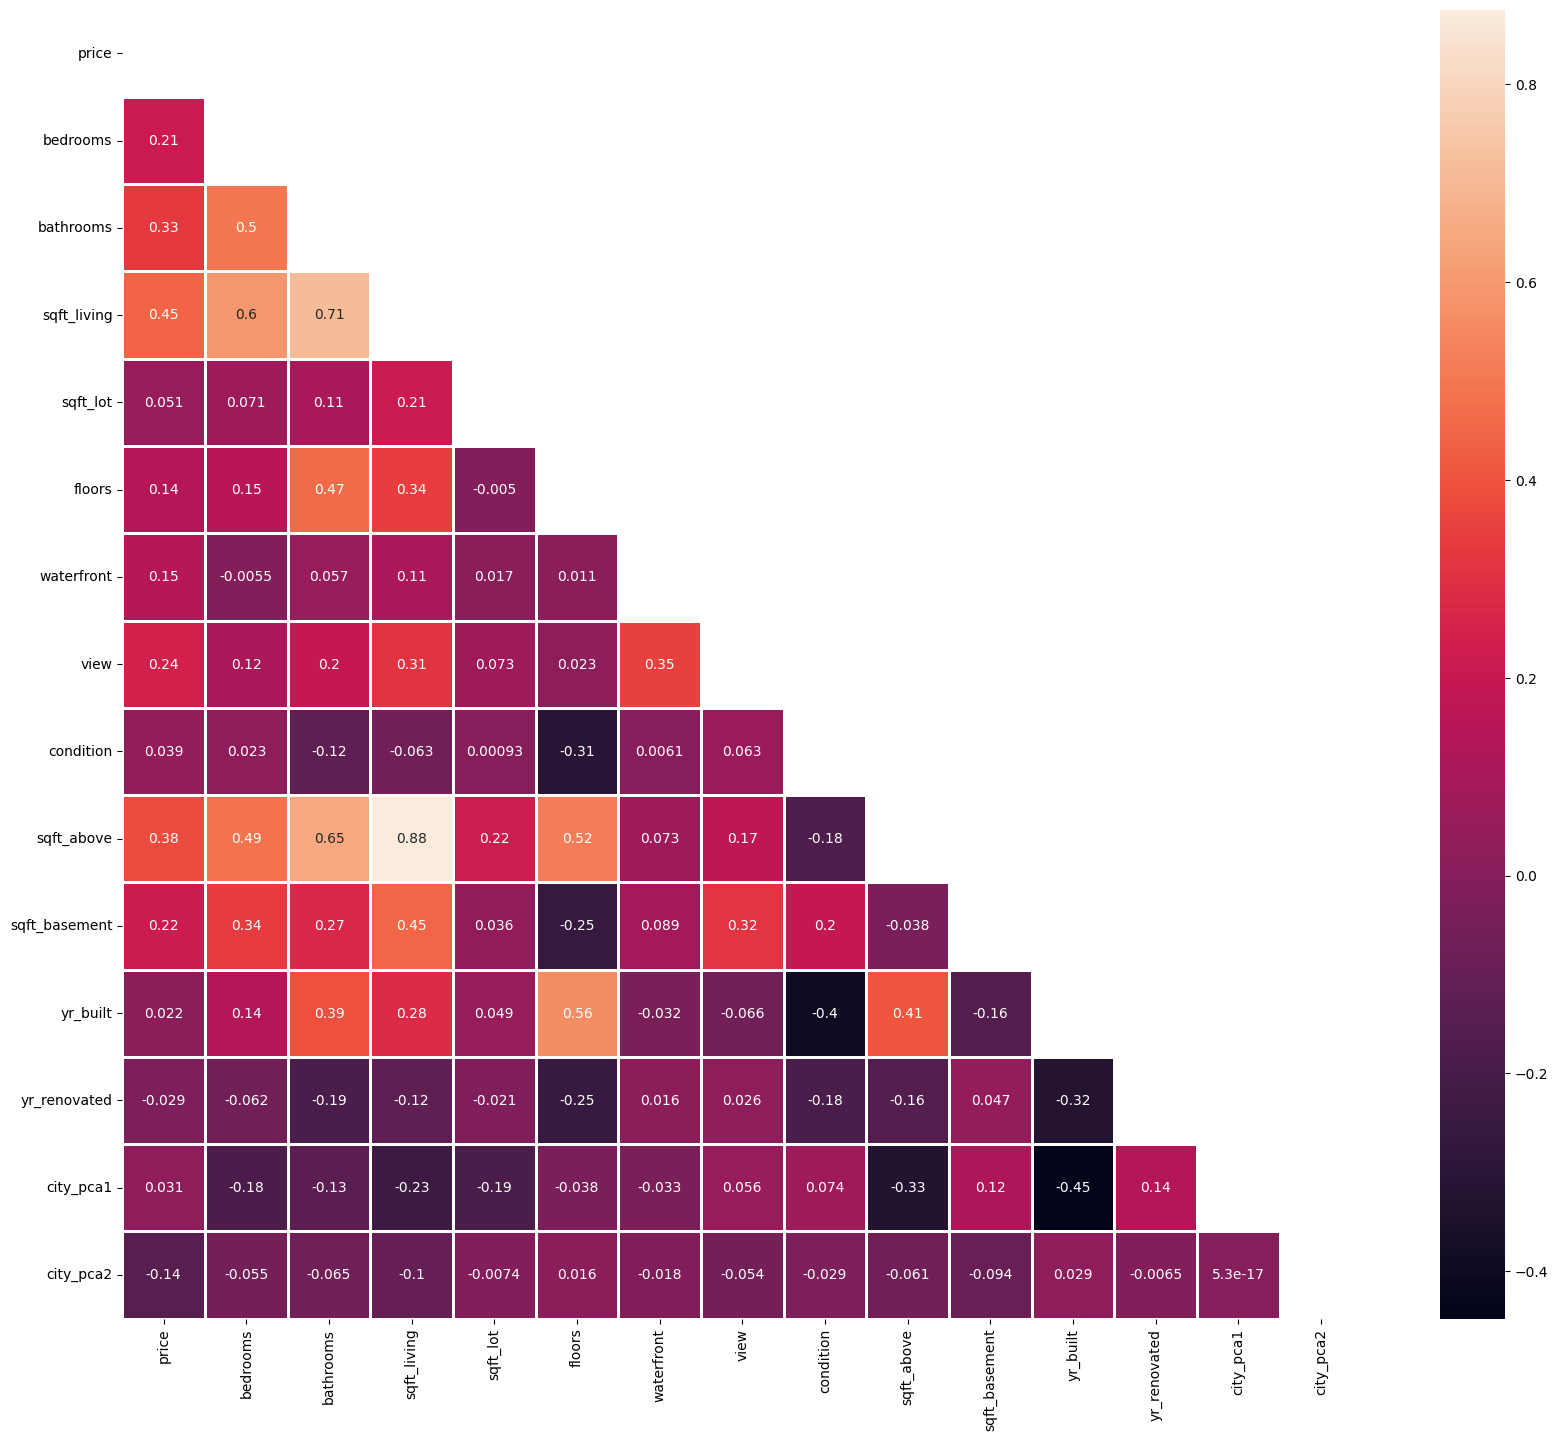

In [119]:
plt.figure(figsize=(20,17))
matrix=np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap='rocket');
plt.show()

In [61]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [121]:
x_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
964          3          1         2060     44866       1           0     0   
2455         3          1         1900      8540       1           0     0   
3491         4          3         4040     20001       1           0     0   
223          5          3         2890      5000       1           0     0   
475          2          2         1230      1391       2           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  \
964           3        2060              0      1953             0    1808   
2455          3         950            950      1980             0     620   
3491          3        2020           2020      1972          2001    2803   
223           3        1310           1580      2006             0    2919   
475           3         870            360      2004          2003     143   

      city  statezip  country  
964     42        44        0  
2455    34        69        0  
3491     8         3        0  
223     35        64        0  
475     35        53        0

In [122]:
x_test.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
2324         3          2         2180     15693       1           0     0   
1978         4          1         1830     29110       2           0     0   
3448         4          1         2110    265716       1           0     0   
1755         4          4         2360     57514       2           0     0   
134          2          1         1770      8640       1           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  \
2324          4        1850            330      1979             0    1397   
1978          3        1230            600      1990          2009    3675   
3448          4        2110              0      1979             0    3549   
1755          4        2360              0      1939          1987    2460   
134           3        1520            250      1949          1998    2866   

      city  statezip  country  
2324    33        43        0  
1978    23        25        0  
3448    31        32        0  
1755    14         2        0  
134     35        56        0

In [123]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [124]:
x_train

array([[-0.42742816, -1.05920929, -0.07132209, ...,  1.35260256,
         0.23620577,  0.        ],
       [-0.42742816, -1.05920929, -0.23787243, ...,  0.67816571,
         1.43655901,  0.        ],
       [ 0.66977812,  1.63413463,  1.98973829, ..., -1.51375406,
        -1.73237353,  0.        ],
       ...,
       [ 0.66977812,  0.28746267,  0.13686583, ..., -0.670708  ,
        -0.96414746,  0.        ],
       [ 0.66977812,  0.28746267,  0.22014099, ...,  0.76247032,
         1.24450249,  0.        ],
       [-0.42742816, -1.05920929, -0.53974491, ...,  0.76247032,
         0.66833294,  0.        ]])

In [125]:
x_test

array([[-0.42742816,  0.28746267,  0.05359066, ...,  0.5938611 ,
         0.18819164,  0.        ],
       [ 0.66977812, -1.05920929, -0.3107382 , ..., -0.24918496,
        -0.67606269,  0.        ],
       [ 0.66977812, -1.05920929, -0.01927511, ...,  0.42525189,
        -0.33996378,  0.        ],
       ...,
       [-1.52463445, -1.05920929, -1.42454356, ...,  0.76247032,
         1.43655901,  0.        ],
       [ 0.66977812,  1.63413463,  1.7086846 , ..., -1.9352771 ,
        -1.58833115,  0.        ],
       [ 0.66977812,  0.28746267,  1.06330206, ...,  0.42525189,
        -0.38797791,  0.        ]])

In [126]:
from sklearn.metrics import mean_squared_error,r2_score


In [127]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [128]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")




print(f"R-Squared Error: {r2}")

Mean Squared Error: 59021191177.95726
R-Squared Error: 0.6202131755087862


In [129]:
diff = y_test - y_pred

<Axes: xlabel='price', ylabel='Density'>

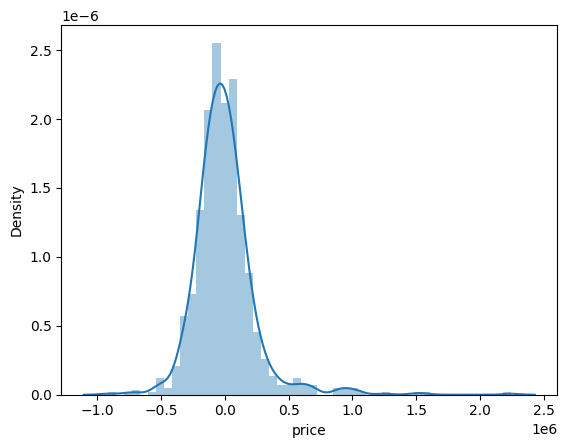

In [130]:
sns.distplot(diff)

<Axes: xlabel='price', ylabel='Density'>

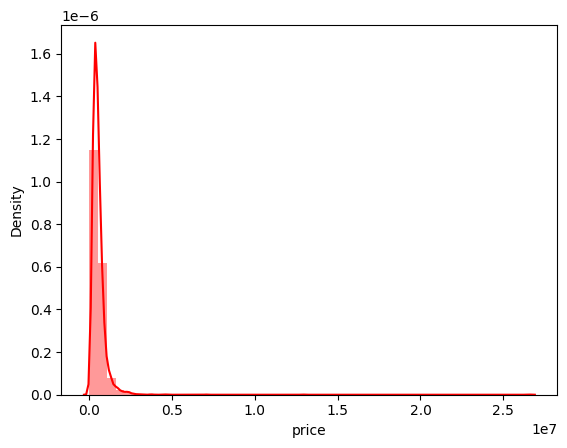

In [131]:
sns.distplot(df['price'],color="red",kde=True)


In [132]:
import xgboost as xgb

In [133]:
xgb_reg=xgb.XGBRegressor()

In [134]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:
y_pred=xgb_reg.predict(x_test)

In [136]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 42681977529.81619
R-Squared Error: 0.7253519899288609


In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
tree_reg=DecisionTreeRegressor()

In [140]:
tree_reg

DecisionTreeRegressor()

In [141]:
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [142]:
y_pred=tree_reg.predict(x_test)

In [143]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 80990392967.52908
R-Squared Error: 0.47884677442902823


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rf_reg= RandomForestRegressor()

In [146]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [147]:
y_pred=rf_reg.predict(x_test)

In [148]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Error: {r2}")

Mean Squared Error: 48610249465.39389
R-Squared Error: 0.687205020540444


In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [150]:
pipeline=Pipeline([("Model",xgb.XGBRegressor())])

In [151]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [152]:
r2_score(y_test,pipeline.predict(x_test))

0.7253519899288609

In [153]:
import pickle
pickle.dump(pipeline, open('./houseprice.pkl', 'wb'))
